In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
Train_data = pd.read_csv('Train_Scaled_Cont_Int.csv')
Validation_data = pd.read_csv('Valid_Scaled_Cont_Int.csv')
Test_data = pd.read_csv('Test_Scaled_Cont_Int.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         12000 non-null  float64
 1   AnnualIncome                12000 non-null  float64
 2   CreditScore                 12000 non-null  float64
 3   EmploymentStatus            12000 non-null  int64  
 4   EducationLevel              12000 non-null  int64  
 5   Experience                  12000 non-null  float64
 6   LoanAmount                  12000 non-null  float64
 7   LoanDuration                12000 non-null  float64
 8   MaritalStatus               12000 non-null  int64  
 9   NumberOfDependents          12000 non-null  float64
 10  HomeOwnershipStatus         12000 non-null  int64  
 11  MonthlyDebtPayments         12000 non-null  float64
 12  CreditCardUtilizationRate   12000 non-null  float64
 13  NumberOfOpenCreditLines     120

In [3]:
Train_data.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,1.487718,-0.305854,-1.172820,0,0,1.549408,-0.674158,-1.226708,1,0.342057,...,-0.830534,-0.707898,-1.340131,-0.327901,-0.120724,0.498070,-0.088823,0.505214,0,0.030033
1,-0.740634,-0.364793,0.315682,0,3,-1.006777,1.288418,1.217582,1,1.776507,...,-0.358890,-0.655377,0.441316,0.194702,0.968318,2.112439,0.565780,0.083891,0,-0.098772
2,0.030718,0.698946,0.746564,0,3,0.050955,-0.530405,-0.737850,0,1.776507,...,0.720578,-0.634868,-1.340131,-0.311338,-1.167424,-0.582772,-0.354121,-0.702282,0,0.287644
3,1.659129,3.766004,1.862940,0,2,1.637552,-0.381553,0.239866,1,-1.092394,...,3.832985,0.895194,-0.894769,-0.005362,-1.350636,-1.302610,-0.601173,-1.033090,1,-2.211181
4,-0.654928,-0.121030,0.061069,0,4,-0.477911,0.913035,-0.248992,0,-0.375169,...,-0.111522,-0.792593,-0.449407,-0.535198,0.161041,0.107046,0.462228,-0.034117,0,0.287644


In [4]:
X_training = Train_data.drop('LoanApproved',axis=1)
X_training = X_training.drop('RiskScore',axis=1)
y_training = Train_data['LoanApproved']

In [5]:
y_training.min()

0

In [7]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
X_validation = X_validation.drop('RiskScore',axis=1)
y_validation = Validation_data['LoanApproved']

In [8]:
X_testing = Test_data.drop('LoanApproved',axis=1)
X_testing = X_testing.drop('RiskScore',axis=1)
y_testing = Test_data['LoanApproved']

In [9]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [10]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [11]:
X_testing.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [12]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

Training Losses are 
          0
0  0.673605
1  0.671449
2  0.669330
3  0.667249
4  0.665205
Validation Data
Confusion Matrix for hidden layer 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


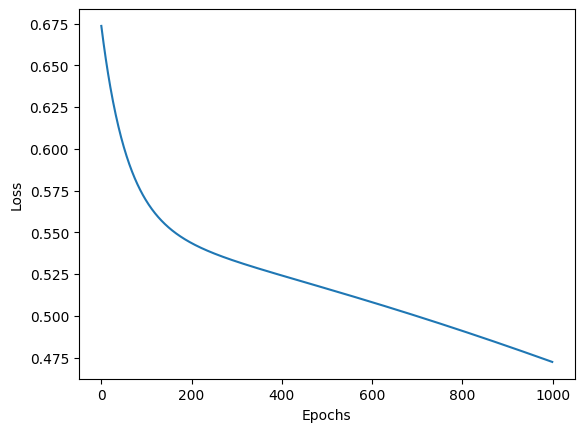

Training Losses are 
          0
0  0.803277
1  0.796480
2  0.789865
3  0.783426
4  0.777160
Validation Data
Confusion Matrix for hidden layer 16
[[3044    0]
 [ 946   10]]
Accuracy: 0.7635, Precision: 1.0000, Recall: 0.0105, F1-score: 0.0207

Test Data
Confusion Matrix for hiden layer 16
[[3044    0]
 [ 946   10]]
Accuracy: 0.7635, Precision: 1.0000, Recall: 0.0105, F1-score: 0.0207



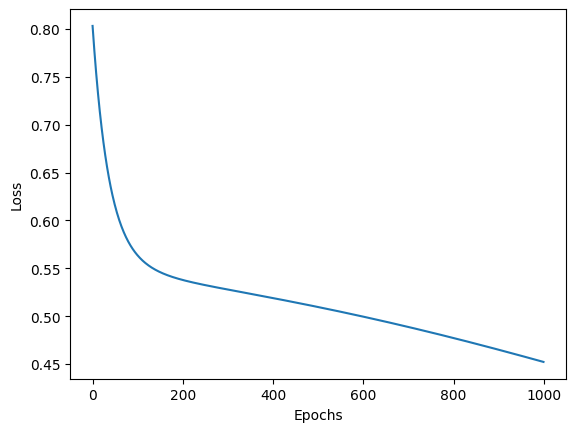

Training Losses are 
          0
0  0.676991
1  0.672153
2  0.667516
3  0.663073
4  0.658814
Validation Data
Confusion Matrix for hidden layer 32
[[3044    0]
 [ 940   16]]
Accuracy: 0.7650, Precision: 1.0000, Recall: 0.0167, F1-score: 0.0329

Test Data
Confusion Matrix for hiden layer 32
[[3044    0]
 [ 938   18]]
Accuracy: 0.7655, Precision: 1.0000, Recall: 0.0188, F1-score: 0.0370



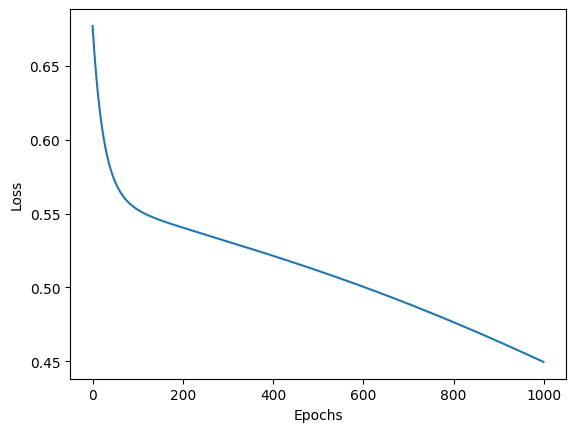

Training Losses are 
          0
0  0.721829
1  0.708071
2  0.695458
3  0.683896
4  0.673294
Validation Data
Confusion Matrix for hidden layer 64
[[3044    0]
 [ 866   90]]
Accuracy: 0.7835, Precision: 1.0000, Recall: 0.0941, F1-score: 0.1721

Test Data
Confusion Matrix for hiden layer 64
[[3044    0]
 [ 855  101]]
Accuracy: 0.7863, Precision: 1.0000, Recall: 0.1056, F1-score: 0.1911



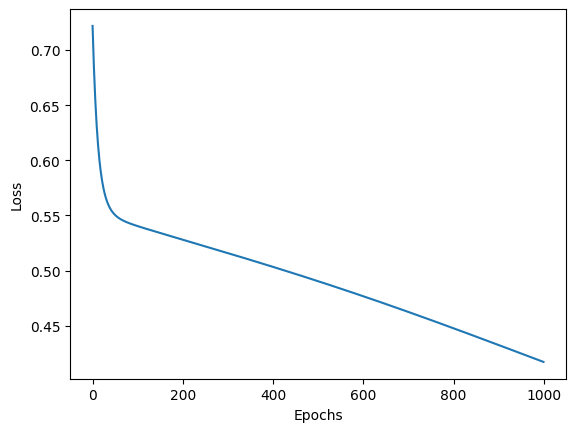

Training Losses are 
          0
0  0.732138
1  0.703012
2  0.678390
3  0.657578
4  0.639978
Validation Data
Confusion Matrix for hidden layer 128
[[3037    7]
 [ 683  273]]
Accuracy: 0.8275, Precision: 0.9750, Recall: 0.2856, F1-score: 0.4417

Test Data
Confusion Matrix for hiden layer 128
[[3038    6]
 [ 670  286]]
Accuracy: 0.8310, Precision: 0.9795, Recall: 0.2992, F1-score: 0.4583



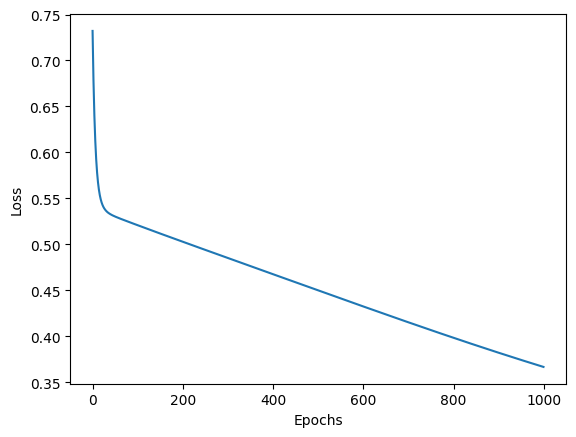

Best accuracy for test data is 0.831 for degree 128


In [13]:
nuerons = [8,16,32,64,128]
min_loss = 0
best_degree = 1000
for nueron in nuerons:
  model = SingleLayer(33,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.SGD(model.parameters(), lr=0.01)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss:
    min_loss = acc
    best_degree = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss} for degree {best_degree}")

Training Losses are 
          0
0  0.691044
1  0.688524
2  0.686013
3  0.683510
4  0.681017
Validation Data
Confusion Matrix for hidden layer 8
[[2976   68]
 [ 155  801]]
Accuracy: 0.9443, Precision: 0.9217, Recall: 0.8379, F1-score: 0.8778

Test Data
Confusion Matrix for hiden layer 8
[[2976   68]
 [ 147  809]]
Accuracy: 0.9463, Precision: 0.9225, Recall: 0.8462, F1-score: 0.8827



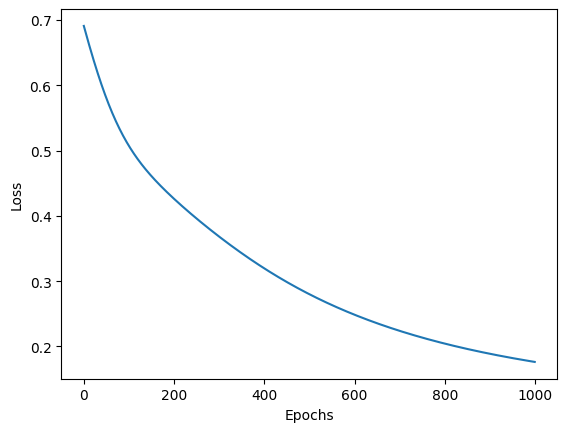

Training Losses are 
          0
0  0.678335
1  0.674266
2  0.670239
3  0.666254
4  0.662313
Validation Data
Confusion Matrix for hidden layer 16
[[2965   79]
 [ 127  829]]
Accuracy: 0.9485, Precision: 0.9130, Recall: 0.8672, F1-score: 0.8895

Test Data
Confusion Matrix for hiden layer 16
[[2962   82]
 [ 107  849]]
Accuracy: 0.9527, Precision: 0.9119, Recall: 0.8881, F1-score: 0.8998



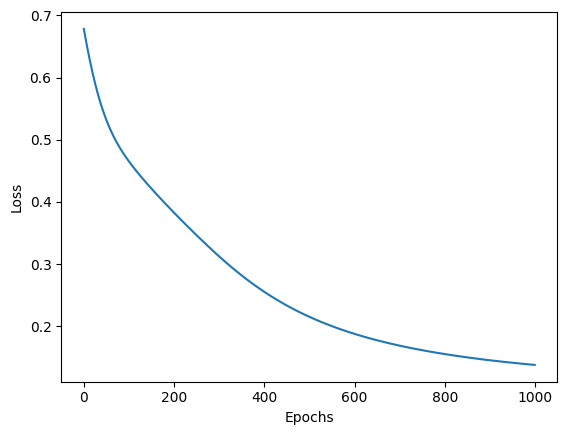

Training Losses are 
          0
0  0.665949
1  0.660349
2  0.654855
3  0.649469
4  0.644192
Validation Data
Confusion Matrix for hidden layer 32
[[2962   82]
 [ 120  836]]
Accuracy: 0.9495, Precision: 0.9107, Recall: 0.8745, F1-score: 0.8922

Test Data
Confusion Matrix for hiden layer 32
[[2966   78]
 [ 102  854]]
Accuracy: 0.9550, Precision: 0.9163, Recall: 0.8933, F1-score: 0.9047



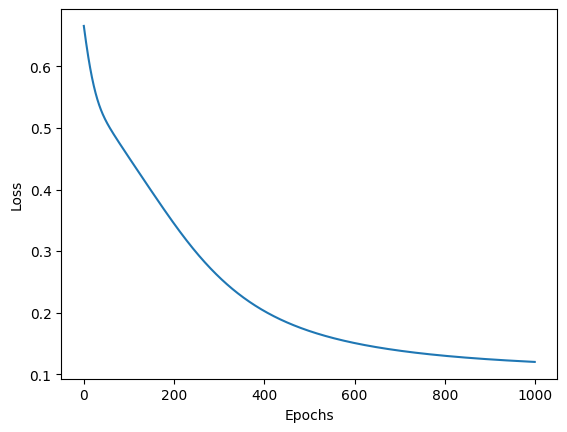

Training Losses are 
          0
0  0.797620
1  0.782646
2  0.768078
3  0.753924
4  0.740192
Validation Data
Confusion Matrix for hidden layer 64
[[2957   87]
 [ 118  838]]
Accuracy: 0.9487, Precision: 0.9059, Recall: 0.8766, F1-score: 0.8910

Test Data
Confusion Matrix for hiden layer 64
[[2962   82]
 [  97  859]]
Accuracy: 0.9553, Precision: 0.9129, Recall: 0.8985, F1-score: 0.9056



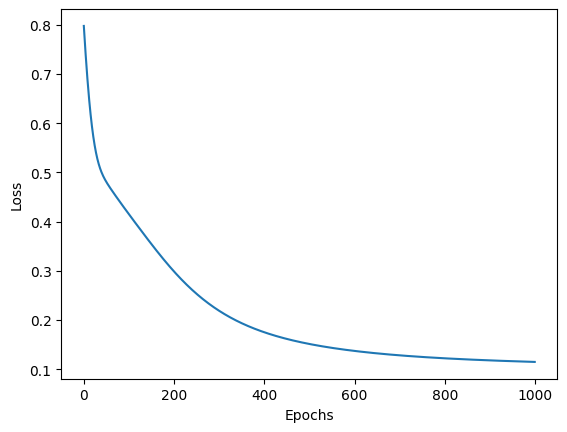

Training Losses are 
          0
0  0.665523
1  0.646819
2  0.629513
3  0.613614
4  0.599117
Validation Data
Confusion Matrix for hidden layer 128
[[2961   83]
 [ 104  852]]
Accuracy: 0.9533, Precision: 0.9112, Recall: 0.8912, F1-score: 0.9011

Test Data
Confusion Matrix for hiden layer 128
[[2960   84]
 [  94  862]]
Accuracy: 0.9555, Precision: 0.9112, Recall: 0.9017, F1-score: 0.9064



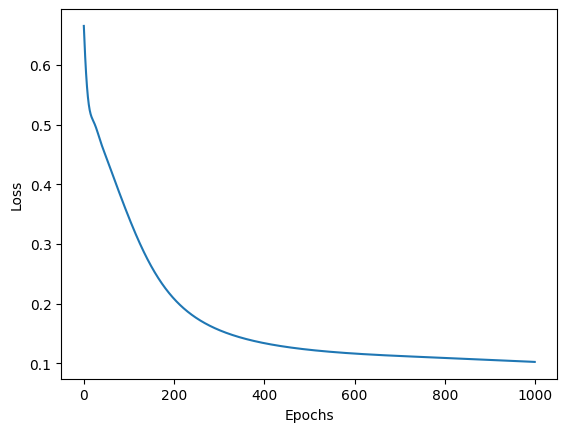

Best accuracy for test data is 0.9555 for degree 128


In [15]:
nuerons = [8,16,32,64,128]
min_loss_2 = 0
best_degree_2 = 1000
for nueron in nuerons:
  model = SingleLayer(33,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.Adam(model.parameters(), lr=0.001)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss_2:
    min_loss_2 = acc
    best_degree_2 = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss_2} for degree {best_degree_2}")
  #HARDWARE PROBELM MIGHT WORK BETTER WITH A GOOD HARDWARE

In [16]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.847031
1  0.844406
2  0.841794
3  0.839196
4  0.836612
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3021   23]
 [ 227  729]]
Accuracy: 0.9375, Precision: 0.9694, Recall: 0.7626, F1-score: 0.8536

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3013   31]
 [ 215  741]]
Accuracy: 0.9385, Precision: 0.9598, Recall: 0.7751, F1-score: 0.8576



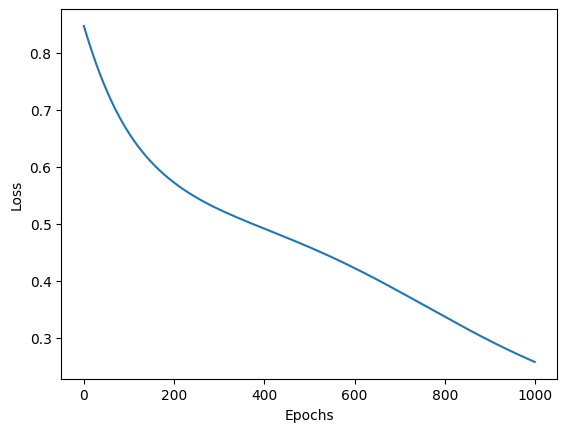

Training Losses are 
          0
0  0.891152
1  0.886397
2  0.881682
3  0.877007
4  0.872373
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[2969   75]
 [ 121  835]]
Accuracy: 0.9510, Precision: 0.9176, Recall: 0.8734, F1-score: 0.8950

Test Data
Confusion Matrix for hiden layer 8 and 16
[[2964   80]
 [ 103  853]]
Accuracy: 0.9543, Precision: 0.9143, Recall: 0.8923, F1-score: 0.9031



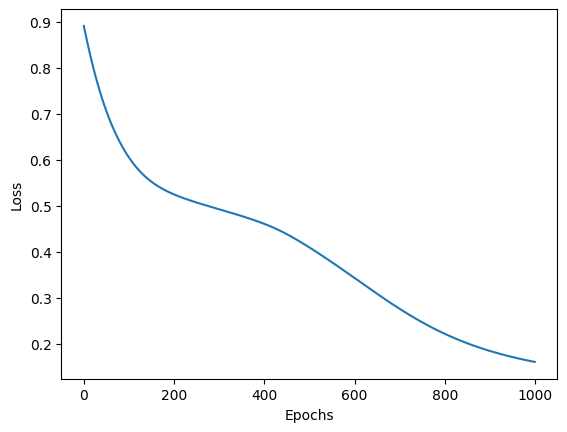

Training Losses are 
          0
0  0.667505
1  0.662595
2  0.657788
3  0.653084
4  0.648485
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[2952   92]
 [  99  857]]
Accuracy: 0.9523, Precision: 0.9031, Recall: 0.8964, F1-score: 0.8997

Test Data
Confusion Matrix for hiden layer 8 and 32
[[2958   86]
 [  89  867]]
Accuracy: 0.9563, Precision: 0.9098, Recall: 0.9069, F1-score: 0.9083



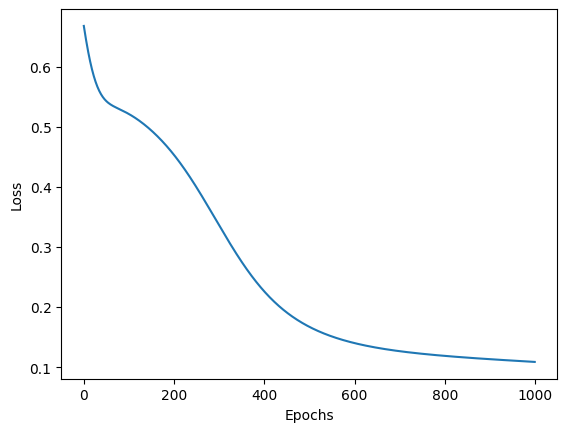

Training Losses are 
          0
0  0.704276
1  0.694156
2  0.684397
3  0.675003
4  0.665979
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[2962   82]
 [  98  858]]
Accuracy: 0.9550, Precision: 0.9128, Recall: 0.8975, F1-score: 0.9051

Test Data
Confusion Matrix for hiden layer 8 and 64
[[2962   82]
 [  84  872]]
Accuracy: 0.9585, Precision: 0.9140, Recall: 0.9121, F1-score: 0.9131



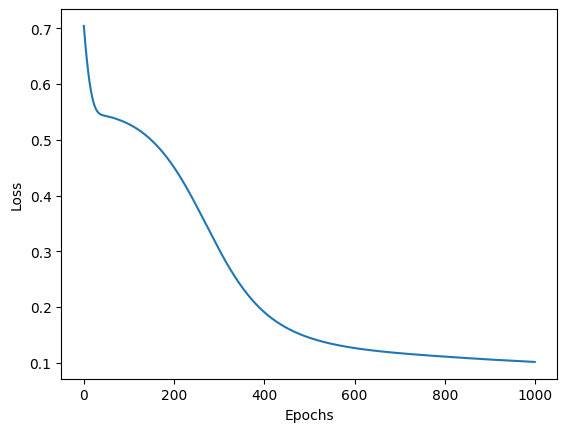

Training Losses are 
          0
0  0.736069
1  0.733063
2  0.730080
3  0.727122
4  0.724188
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[2959   85]
 [ 112  844]]
Accuracy: 0.9507, Precision: 0.9085, Recall: 0.8828, F1-score: 0.8955

Test Data
Confusion Matrix for hiden layer 16 and 8
[[2959   85]
 [ 101  855]]
Accuracy: 0.9535, Precision: 0.9096, Recall: 0.8944, F1-score: 0.9019



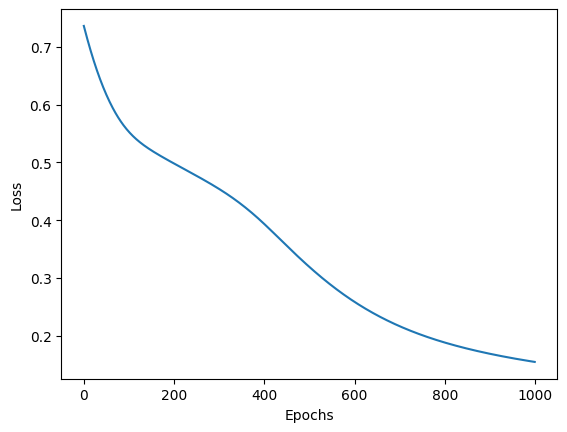

Training Losses are 
          0
0  0.679125
1  0.675868
2  0.672655
3  0.669489
4  0.666369
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[2958   86]
 [  96  860]]
Accuracy: 0.9545, Precision: 0.9091, Recall: 0.8996, F1-score: 0.9043

Test Data
Confusion Matrix for hiden layer 16 and 16
[[2952   92]
 [  84  872]]
Accuracy: 0.9560, Precision: 0.9046, Recall: 0.9121, F1-score: 0.9083



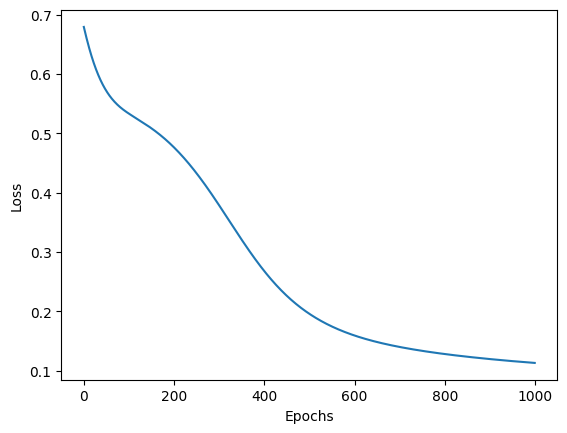

Training Losses are 
          0
0  0.701434
1  0.694844
2  0.688404
3  0.682116
4  0.675982
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[2959   85]
 [  97  859]]
Accuracy: 0.9545, Precision: 0.9100, Recall: 0.8985, F1-score: 0.9042

Test Data
Confusion Matrix for hiden layer 16 and 32
[[2952   92]
 [  84  872]]
Accuracy: 0.9560, Precision: 0.9046, Recall: 0.9121, F1-score: 0.9083



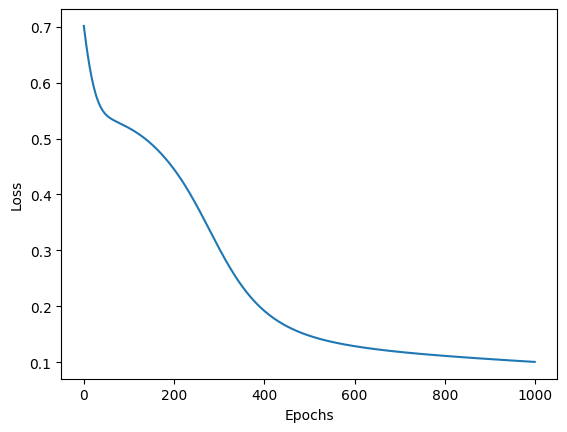

Training Losses are 
          0
0  0.620720
1  0.613468
2  0.606643
3  0.600247
4  0.594282
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[2961   83]
 [  97  859]]
Accuracy: 0.9550, Precision: 0.9119, Recall: 0.8985, F1-score: 0.9052

Test Data
Confusion Matrix for hiden layer 16 and 64
[[2958   86]
 [  91  865]]
Accuracy: 0.9557, Precision: 0.9096, Recall: 0.9048, F1-score: 0.9072



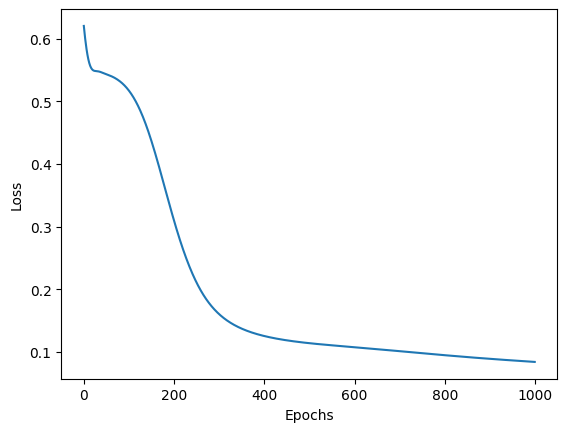

Training Losses are 
          0
0  0.749727
1  0.745936
2  0.742181
3  0.738463
4  0.734782
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[2957   87]
 [  97  859]]
Accuracy: 0.9540, Precision: 0.9080, Recall: 0.8985, F1-score: 0.9033

Test Data
Confusion Matrix for hiden layer 32 and 8
[[2954   90]
 [  84  872]]
Accuracy: 0.9565, Precision: 0.9064, Recall: 0.9121, F1-score: 0.9093



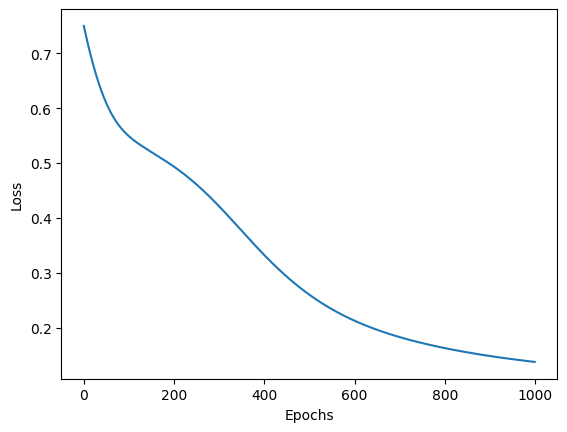

Training Losses are 
          0
0  0.817463
1  0.810713
2  0.804060
3  0.797506
4  0.791052
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[2963   81]
 [  96  860]]
Accuracy: 0.9557, Precision: 0.9139, Recall: 0.8996, F1-score: 0.9067

Test Data
Confusion Matrix for hiden layer 32 and 16
[[2951   93]
 [  85  871]]
Accuracy: 0.9555, Precision: 0.9035, Recall: 0.9111, F1-score: 0.9073



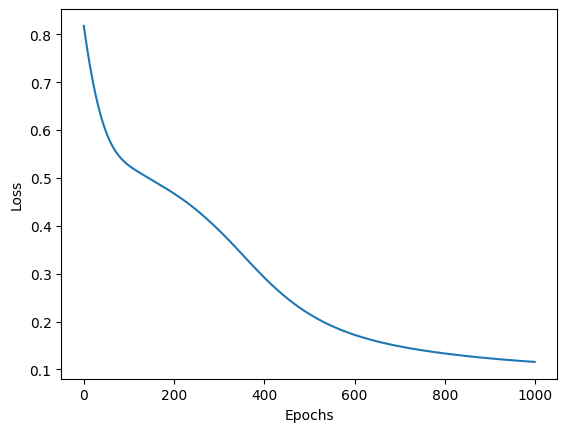

Training Losses are 
          0
0  0.655697
1  0.649100
2  0.642719
3  0.636559
4  0.630621
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[2951   93]
 [  97  859]]
Accuracy: 0.9525, Precision: 0.9023, Recall: 0.8985, F1-score: 0.9004

Test Data
Confusion Matrix for hiden layer 32 and 32
[[2952   92]
 [  82  874]]
Accuracy: 0.9565, Precision: 0.9048, Recall: 0.9142, F1-score: 0.9095



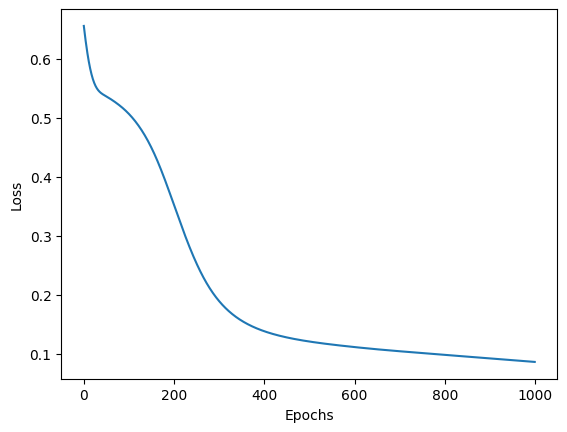

Training Losses are 
          0
0  0.663951
1  0.652743
2  0.642131
3  0.632121
4  0.622720
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[2949   95]
 [  97  859]]
Accuracy: 0.9520, Precision: 0.9004, Recall: 0.8985, F1-score: 0.8995

Test Data
Confusion Matrix for hiden layer 32 and 64
[[2949   95]
 [  84  872]]
Accuracy: 0.9553, Precision: 0.9018, Recall: 0.9121, F1-score: 0.9069



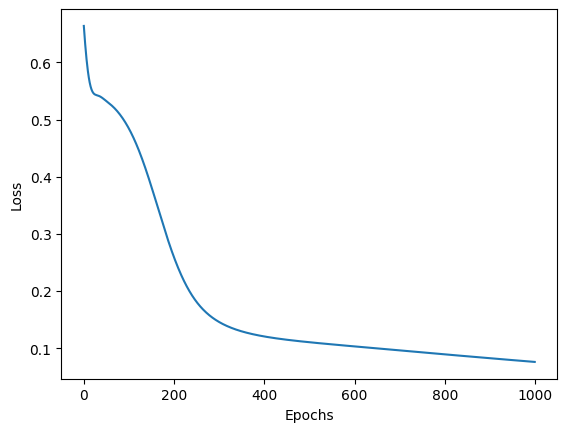

Training Losses are 
          0
0  0.646150
1  0.641597
2  0.637150
3  0.632810
4  0.628582
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[2967   77]
 [  93  863]]
Accuracy: 0.9575, Precision: 0.9181, Recall: 0.9027, F1-score: 0.9103

Test Data
Confusion Matrix for hiden layer 64 and 8
[[2955   89]
 [  85  871]]
Accuracy: 0.9565, Precision: 0.9073, Recall: 0.9111, F1-score: 0.9092



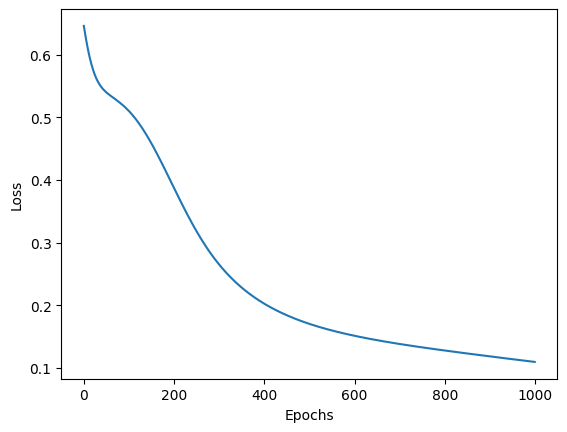

Training Losses are 
          0
0  0.623272
1  0.618272
2  0.613455
3  0.608823
4  0.604379
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[2953   91]
 [  98  858]]
Accuracy: 0.9527, Precision: 0.9041, Recall: 0.8975, F1-score: 0.9008

Test Data
Confusion Matrix for hiden layer 64 and 16
[[2948   96]
 [  85  871]]
Accuracy: 0.9547, Precision: 0.9007, Recall: 0.9111, F1-score: 0.9059



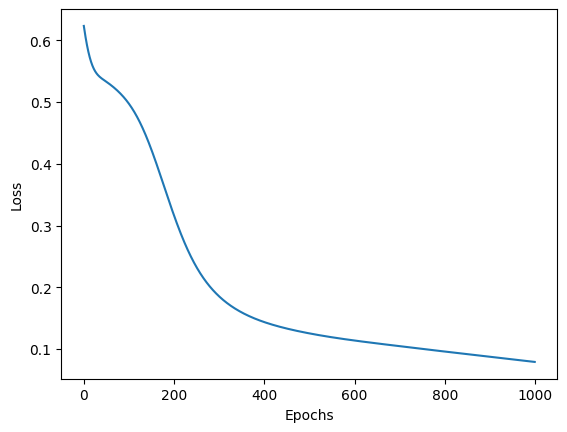

Training Losses are 
          0
0  0.922152
1  0.903797
2  0.885939
3  0.868588
4  0.851751
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[2964   80]
 [  92  864]]
Accuracy: 0.9570, Precision: 0.9153, Recall: 0.9038, F1-score: 0.9095

Test Data
Confusion Matrix for hiden layer 64 and 32
[[2954   90]
 [  87  869]]
Accuracy: 0.9557, Precision: 0.9062, Recall: 0.9090, F1-score: 0.9076



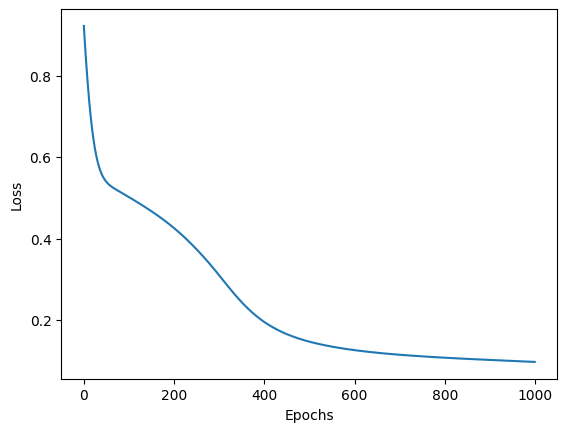

Training Losses are 
          0
0  0.643976
1  0.629537
2  0.616361
3  0.604453
4  0.593807
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[2951   93]
 [  98  858]]
Accuracy: 0.9523, Precision: 0.9022, Recall: 0.8975, F1-score: 0.8998

Test Data
Confusion Matrix for hiden layer 64 and 64
[[2946   98]
 [  98  858]]
Accuracy: 0.9510, Precision: 0.8975, Recall: 0.8975, F1-score: 0.8975



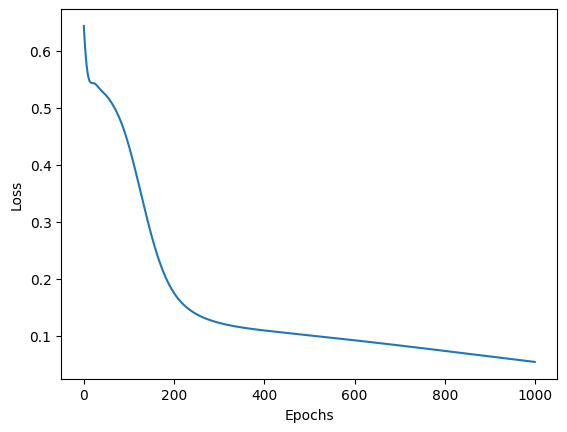

Best accuracy for test data is 0.9585 for degree 8


In [18]:
nuerons = [8,16,32,64]
best_degree_3=0
best_accuracy_2=0

for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(33,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_2:
          best_accuracy_2=acc
          best_degree_4=nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_2} for degree {best_degree_4}")

In [19]:


# Assume `model` is your trained DoubleLayer instance
first_layer = model.layers[0]  # nn.Linear(33, hidden1)

# Extract weight matrix (hidden1 x 33)
weights = first_layer.weight.data  # shape: (hidden1, 33)

# Feature importance: sum of absolute weights per input feature
feature_importance = torch.sum(torch.abs(weights), dim=0)  # shape: (33,)

# Your feature names
feature_names = [
    'Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus', 'EducationLevel',
    'Experience', 'LoanAmount', 'LoanDuration', 'MaritalStatus',
    'NumberOfDependents', 'HomeOwnershipStatus', 'MonthlyDebtPayments', 
    'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
    'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose', 'PreviousLoanDefaults', 
    'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 
    'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 
    'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 
    'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio'
]

# Print importance scores for each feature
for name, score in sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True):
    print(f"{name}: {score.item():.4f}")


EmploymentStatus: 45.8074
InterestRate: 35.0623
NumberOfOpenCreditLines: 34.3788
TotalDebtToIncomeRatio: 31.8159
NumberOfDependents: 31.4804
NumberOfCreditInquiries: 31.2968
JobTenure: 30.9944
UtilityBillsPaymentHistory: 29.5157
DebtToIncomeRatio: 29.2051
CreditCardUtilizationRate: 28.5385
SavingsAccountBalance: 28.3232
CheckingAccountBalance: 26.4220
MaritalStatus: 23.6274
MonthlyIncome: 23.1984
PaymentHistory: 22.3997
LengthOfCreditHistory: 22.0455
Experience: 21.6128
LoanDuration: 20.9622
Age: 20.3916
HomeOwnershipStatus: 19.7985
TotalLiabilities: 19.3334
LoanAmount: 18.8017
MonthlyDebtPayments: 18.2229
PreviousLoanDefaults: 17.5500
NetWorth: 17.5360
AnnualIncome: 17.4526
LoanPurpose: 16.5604
BankruptcyHistory: 15.3973
EducationLevel: 13.8001
CreditScore: 12.0731
TotalAssets: 11.9530
BaseInterestRate: 9.7190
MonthlyLoanPayment: 7.9780


In [20]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.635294
1  0.633849
2  0.632417
3  0.630997
4  0.629590
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[2948   96]
 [  91  865]]
Accuracy: 0.9533, Precision: 0.9001, Recall: 0.9048, F1-score: 0.9025

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[2944  100]
 [  86  870]]
Accuracy: 0.9535, Precision: 0.8969, Recall: 0.9100, F1-score: 0.9034



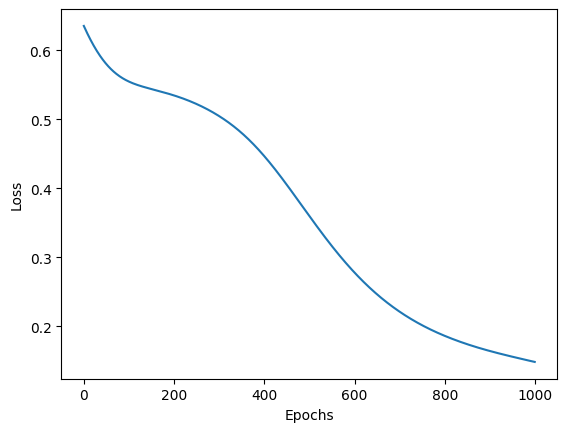

Training Losses are 
          0
0  0.654788
1  0.652170
2  0.649586
3  0.647038
4  0.644525
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[2949   95]
 [  89  867]]
Accuracy: 0.9540, Precision: 0.9012, Recall: 0.9069, F1-score: 0.9041

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[2943  101]
 [  80  876]]
Accuracy: 0.9547, Precision: 0.8966, Recall: 0.9163, F1-score: 0.9064



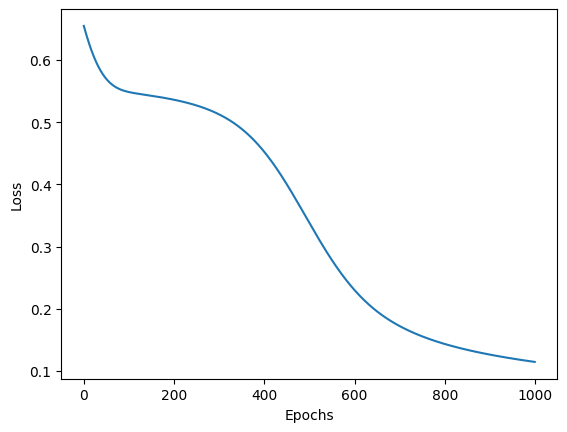

Training Losses are 
          0
0  0.631987
1  0.627870
2  0.623867
3  0.619979
4  0.616207
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[2948   96]
 [  93  863]]
Accuracy: 0.9527, Precision: 0.8999, Recall: 0.9027, F1-score: 0.9013

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[2951   93]
 [  79  877]]
Accuracy: 0.9570, Precision: 0.9041, Recall: 0.9174, F1-score: 0.9107



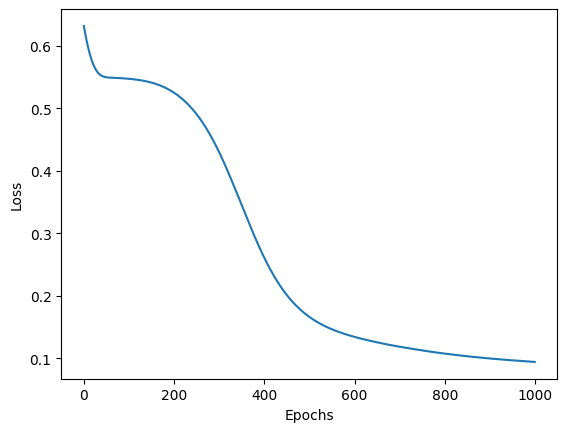

Training Losses are 
          0
0  0.668428
1  0.659326
2  0.650622
3  0.642323
4  0.634430
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[2953   91]
 [  99  857]]
Accuracy: 0.9525, Precision: 0.9040, Recall: 0.8964, F1-score: 0.9002

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[2949   95]
 [  86  870]]
Accuracy: 0.9547, Precision: 0.9016, Recall: 0.9100, F1-score: 0.9058



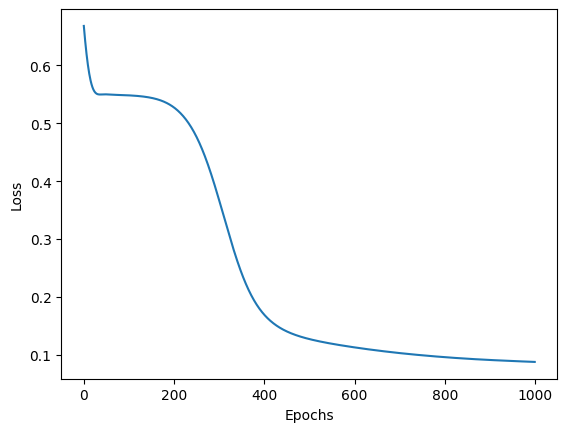

Training Losses are 
          0
0  0.628354
1  0.626680
2  0.625022
3  0.623382
4  0.621759
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[2952   92]
 [  98  858]]
Accuracy: 0.9525, Precision: 0.9032, Recall: 0.8975, F1-score: 0.9003

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[2943  101]
 [  78  878]]
Accuracy: 0.9553, Precision: 0.8968, Recall: 0.9184, F1-score: 0.9075



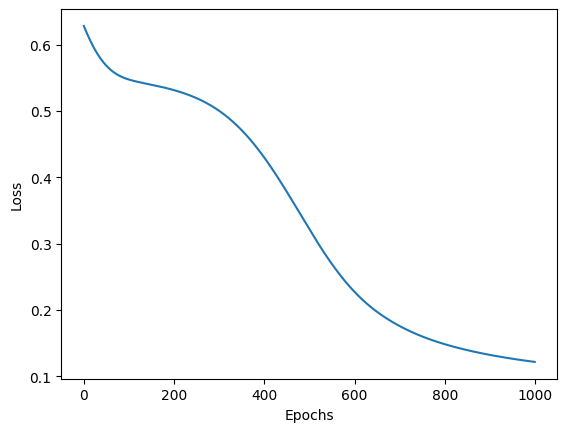

Training Losses are 
          0
0  0.810755
1  0.805776
2  0.800855
3  0.795995
4  0.791196
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[2956   88]
 [  87  869]]
Accuracy: 0.9563, Precision: 0.9080, Recall: 0.9090, F1-score: 0.9085

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[2954   90]
 [  86  870]]
Accuracy: 0.9560, Precision: 0.9062, Recall: 0.9100, F1-score: 0.9081



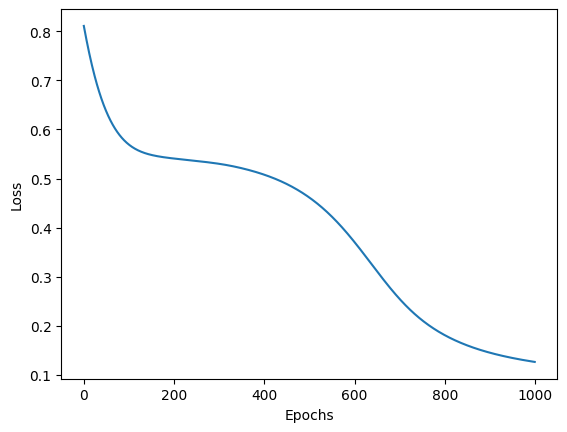

Training Losses are 
          0
0  0.700688
1  0.694293
2  0.688048
3  0.681958
4  0.676023
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[2952   92]
 [  91  865]]
Accuracy: 0.9543, Precision: 0.9039, Recall: 0.9048, F1-score: 0.9043

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[2944  100]
 [  82  874]]
Accuracy: 0.9545, Precision: 0.8973, Recall: 0.9142, F1-score: 0.9057



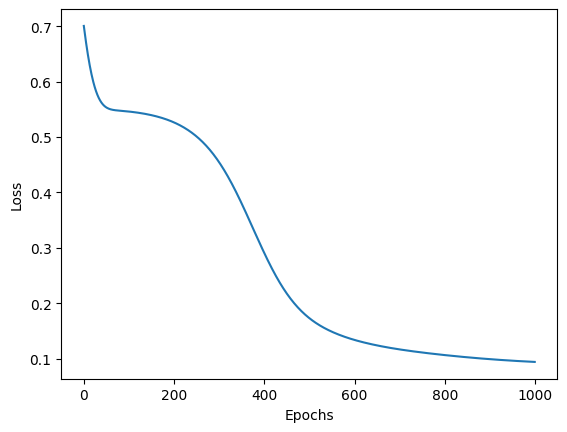

Training Losses are 
          0
0  0.590191
1  0.584770
2  0.579770
3  0.575194
4  0.571041
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[2949   95]
 [  91  865]]
Accuracy: 0.9535, Precision: 0.9010, Recall: 0.9048, F1-score: 0.9029

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[2947   97]
 [  90  866]]
Accuracy: 0.9533, Precision: 0.8993, Recall: 0.9059, F1-score: 0.9026



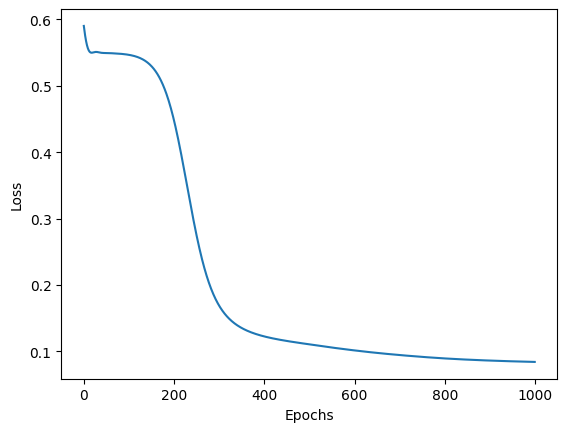

Training Losses are 
          0
0  0.649990
1  0.647564
2  0.645170
3  0.642809
4  0.640483
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[2947   97]
 [  91  865]]
Accuracy: 0.9530, Precision: 0.8992, Recall: 0.9048, F1-score: 0.9020

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[2938  106]
 [  78  878]]
Accuracy: 0.9540, Precision: 0.8923, Recall: 0.9184, F1-score: 0.9052



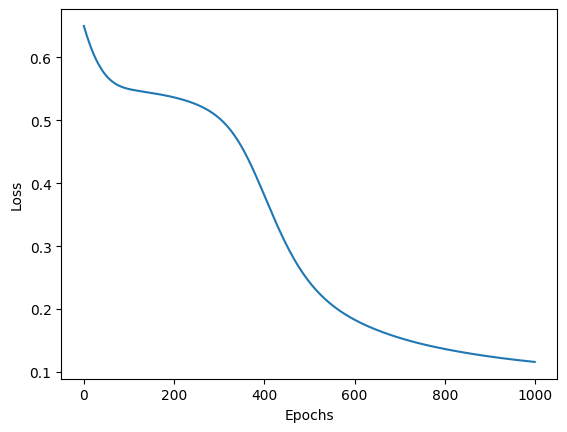

Training Losses are 
          0
0  0.650187
1  0.645924
2  0.641755
3  0.637682
4  0.633706
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[2941  103]
 [  92  864]]
Accuracy: 0.9513, Precision: 0.8935, Recall: 0.9038, F1-score: 0.8986

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[2944  100]
 [  76  880]]
Accuracy: 0.9560, Precision: 0.8980, Recall: 0.9205, F1-score: 0.9091



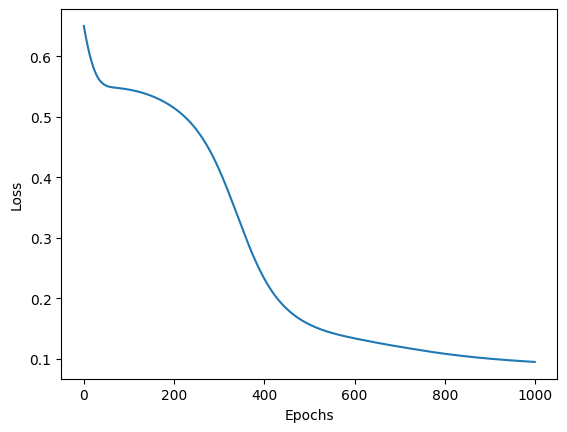

Training Losses are 
          0
0  0.929727
1  0.917404
2  0.905314
3  0.893461
4  0.881848
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[2955   89]
 [  99  857]]
Accuracy: 0.9530, Precision: 0.9059, Recall: 0.8964, F1-score: 0.9012

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[2939  105]
 [  77  879]]
Accuracy: 0.9545, Precision: 0.8933, Recall: 0.9195, F1-score: 0.9062



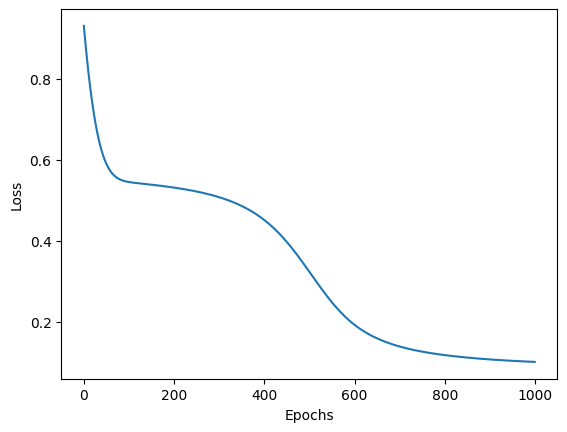

Training Losses are 
          0
0  0.758531
1  0.743065
2  0.728244
3  0.714077
4  0.700574
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[2947   97]
 [ 102  854]]
Accuracy: 0.9503, Precision: 0.8980, Recall: 0.8933, F1-score: 0.8956

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[2951   93]
 [  75  881]]
Accuracy: 0.9580, Precision: 0.9045, Recall: 0.9215, F1-score: 0.9130



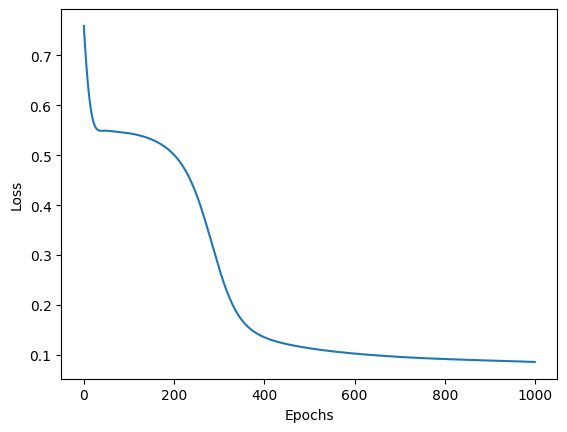

Training Losses are 
          0
0  0.662067
1  0.657682
2  0.653390
3  0.649192
4  0.645091
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[2951   93]
 [  86  870]]
Accuracy: 0.9553, Precision: 0.9034, Recall: 0.9100, F1-score: 0.9067

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[2951   93]
 [  84  872]]
Accuracy: 0.9557, Precision: 0.9036, Recall: 0.9121, F1-score: 0.9079



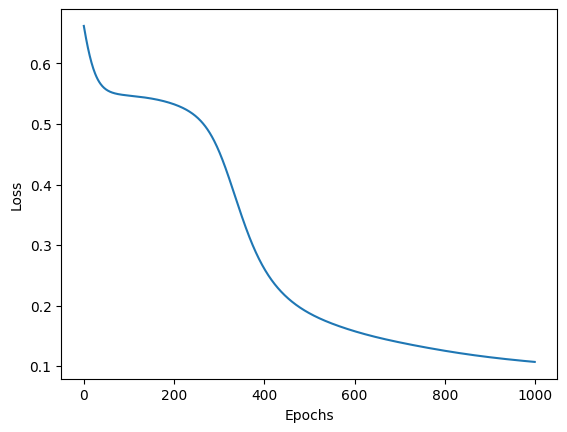

Training Losses are 
          0
0  0.685728
1  0.678812
2  0.672097
3  0.665588
4  0.659289
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[2944  100]
 [  95  861]]
Accuracy: 0.9513, Precision: 0.8959, Recall: 0.9006, F1-score: 0.8983

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[2952   92]
 [  83  873]]
Accuracy: 0.9563, Precision: 0.9047, Recall: 0.9132, F1-score: 0.9089



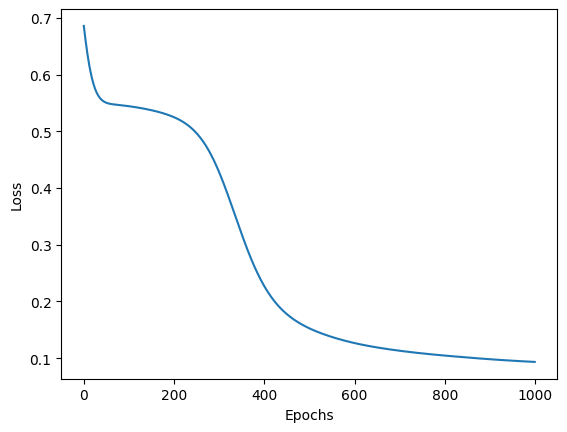

Training Losses are 
          0
0  0.719826
1  0.708618
2  0.697825
3  0.687452
4  0.677507
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[2946   98]
 [  98  858]]
Accuracy: 0.9510, Precision: 0.8975, Recall: 0.8975, F1-score: 0.8975

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[2947   97]
 [  81  875]]
Accuracy: 0.9555, Precision: 0.9002, Recall: 0.9153, F1-score: 0.9077



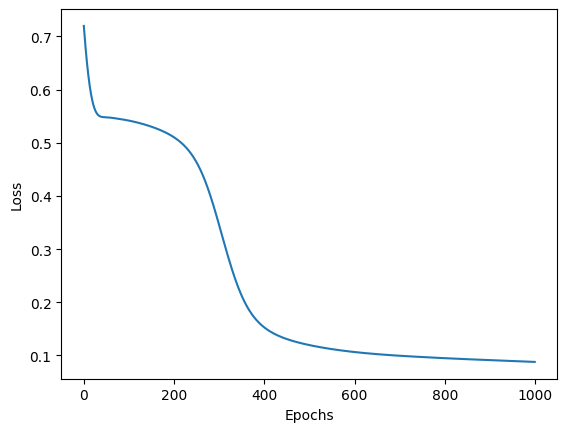

Training Losses are 
          0
0  0.726556
1  0.706973
2  0.688651
3  0.671606
4  0.655846
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[2942  102]
 [  95  861]]
Accuracy: 0.9507, Precision: 0.8941, Recall: 0.9006, F1-score: 0.8973

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[2944  100]
 [  81  875]]
Accuracy: 0.9547, Precision: 0.8974, Recall: 0.9153, F1-score: 0.9063



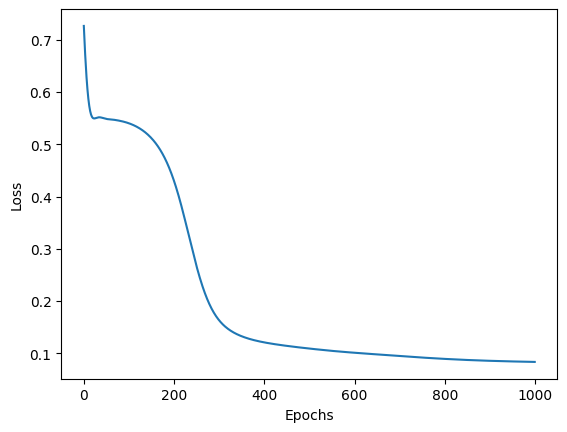

Training Losses are 
          0
0  0.632956
1  0.631565
2  0.630187
3  0.628820
4  0.627466
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[2947   97]
 [  90  866]]
Accuracy: 0.9533, Precision: 0.8993, Recall: 0.9059, F1-score: 0.9026

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[2941  103]
 [  84  872]]
Accuracy: 0.9533, Precision: 0.8944, Recall: 0.9121, F1-score: 0.9032



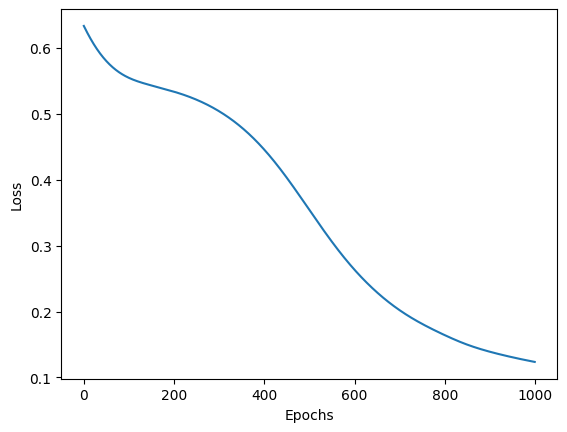

Training Losses are 
          0
0  0.669648
1  0.666819
2  0.664025
3  0.661266
4  0.658543
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[2949   95]
 [  95  861]]
Accuracy: 0.9525, Precision: 0.9006, Recall: 0.9006, F1-score: 0.9006

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[2938  106]
 [  83  873]]
Accuracy: 0.9527, Precision: 0.8917, Recall: 0.9132, F1-score: 0.9023



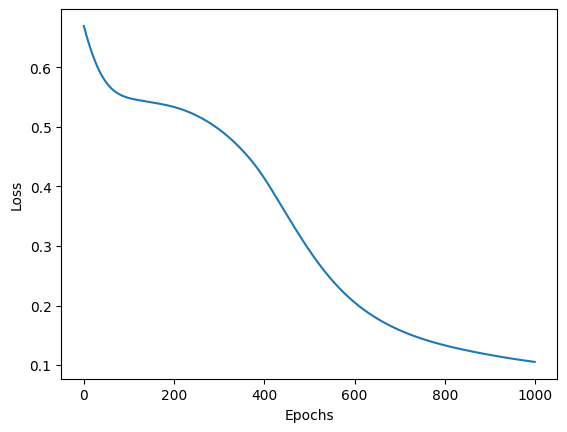

Training Losses are 
          0
0  0.732485
1  0.726405
2  0.720434
3  0.714574
4  0.708826
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[2944  100]
 [  94  862]]
Accuracy: 0.9515, Precision: 0.8960, Recall: 0.9017, F1-score: 0.8989

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[2945   99]
 [  80  876]]
Accuracy: 0.9553, Precision: 0.8985, Recall: 0.9163, F1-score: 0.9073



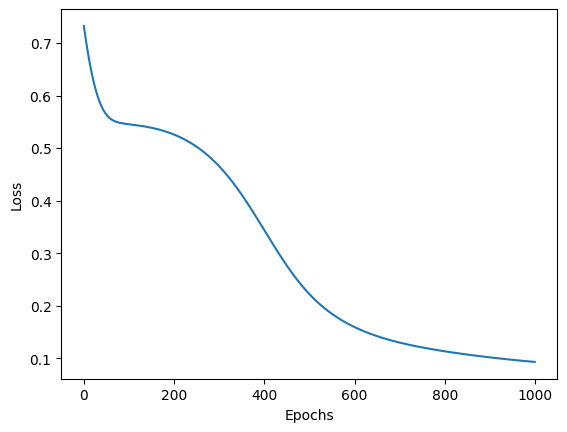

Training Losses are 
          0
0  0.781570
1  0.768790
2  0.756392
3  0.744384
4  0.732773
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[2948   96]
 [  99  857]]
Accuracy: 0.9513, Precision: 0.8993, Recall: 0.8964, F1-score: 0.8979

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[2934  110]
 [  92  864]]
Accuracy: 0.9495, Precision: 0.8871, Recall: 0.9038, F1-score: 0.8953



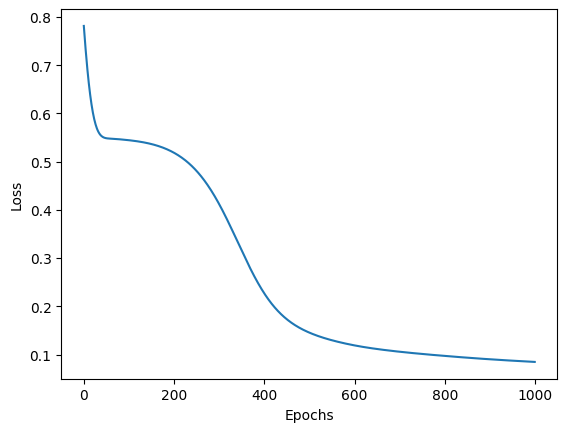

Training Losses are 
          0
0  0.729215
1  0.726596
2  0.723994
3  0.721410
4  0.718843
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[2962   82]
 [  91  865]]
Accuracy: 0.9567, Precision: 0.9134, Recall: 0.9048, F1-score: 0.9091

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[2944  100]
 [  88  868]]
Accuracy: 0.9530, Precision: 0.8967, Recall: 0.9079, F1-score: 0.9023



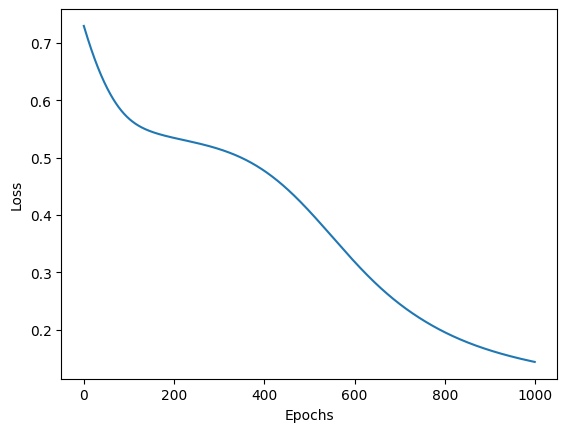

Training Losses are 
          0
0  0.761043
1  0.756678
2  0.752360
3  0.748089
4  0.743867
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[2946   98]
 [  88  868]]
Accuracy: 0.9535, Precision: 0.8986, Recall: 0.9079, F1-score: 0.9032

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[2935  109]
 [  80  876]]
Accuracy: 0.9527, Precision: 0.8893, Recall: 0.9163, F1-score: 0.9026



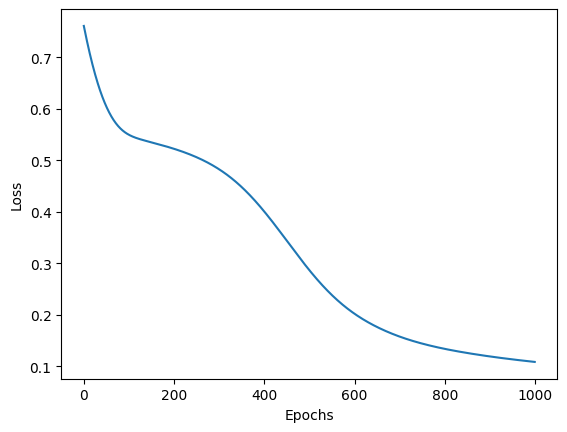

Training Losses are 
          0
0  0.725436
1  0.718793
2  0.712294
3  0.705942
4  0.699737
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[2946   98]
 [  96  860]]
Accuracy: 0.9515, Precision: 0.8977, Recall: 0.8996, F1-score: 0.8986

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[2933  111]
 [  87  869]]
Accuracy: 0.9505, Precision: 0.8867, Recall: 0.9090, F1-score: 0.8977



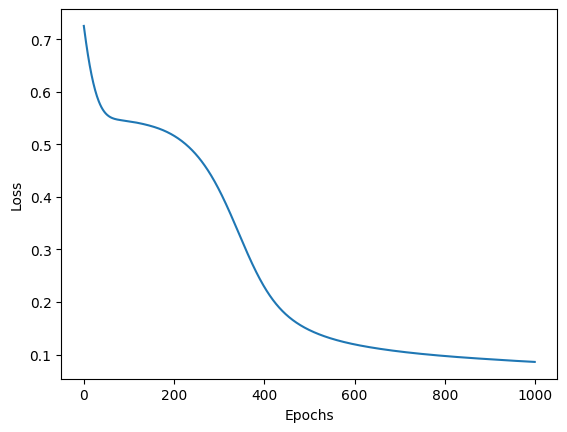

Training Losses are 
          0
0  0.721211
1  0.709478
2  0.698188
3  0.687348
4  0.676965
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[2935  109]
 [ 102  854]]
Accuracy: 0.9473, Precision: 0.8868, Recall: 0.8933, F1-score: 0.8900

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[2943  101]
 [  92  864]]
Accuracy: 0.9517, Precision: 0.8953, Recall: 0.9038, F1-score: 0.8995



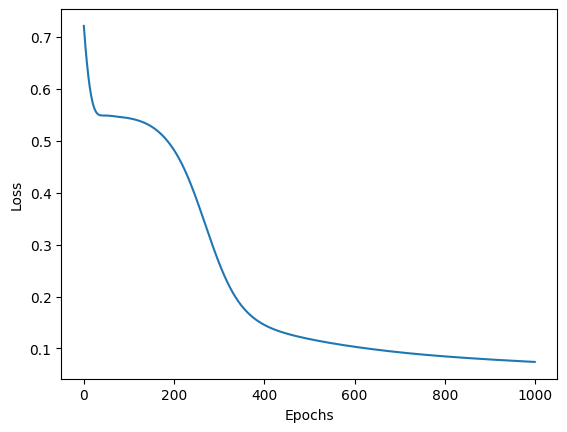

Training Losses are 
          0
0  0.660329
1  0.657695
2  0.655099
3  0.652541
4  0.650023
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[2951   93]
 [  99  857]]
Accuracy: 0.9520, Precision: 0.9021, Recall: 0.8964, F1-score: 0.8993

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[2951   93]
 [  88  868]]
Accuracy: 0.9547, Precision: 0.9032, Recall: 0.9079, F1-score: 0.9056



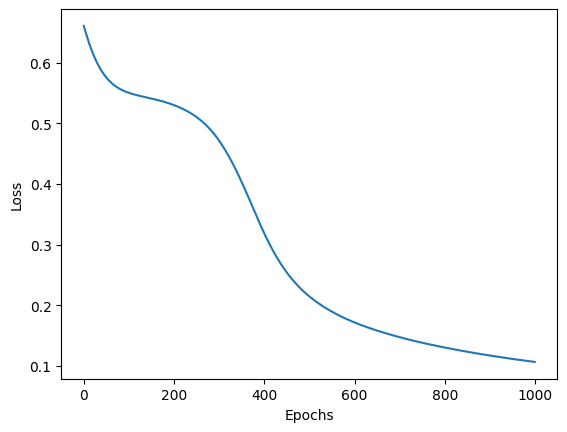

Training Losses are 
          0
0  0.643640
1  0.639751
2  0.635944
3  0.632222
4  0.628586
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[2939  105]
 [  96  860]]
Accuracy: 0.9497, Precision: 0.8912, Recall: 0.8996, F1-score: 0.8954

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[2933  111]
 [  93  863]]
Accuracy: 0.9490, Precision: 0.8860, Recall: 0.9027, F1-score: 0.8943



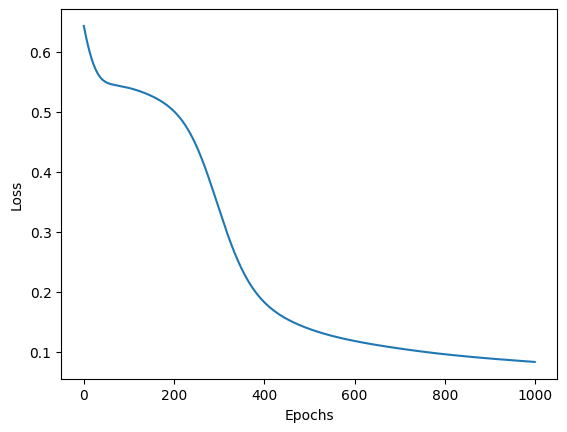

Training Losses are 
          0
0  0.836186
1  0.824860
2  0.813790
3  0.802982
4  0.792439
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[2948   96]
 [  97  859]]
Accuracy: 0.9517, Precision: 0.8995, Recall: 0.8985, F1-score: 0.8990

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[2946   98]
 [  82  874]]
Accuracy: 0.9550, Precision: 0.8992, Recall: 0.9142, F1-score: 0.9066



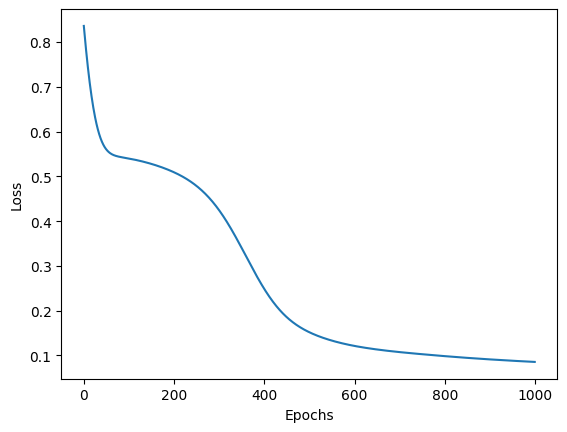

Training Losses are 
          0
0  0.667875
1  0.656187
2  0.645145
3  0.634756
4  0.625028
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[2936  108]
 [ 103  853]]
Accuracy: 0.9473, Precision: 0.8876, Recall: 0.8923, F1-score: 0.8899

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[2937  107]
 [  98  858]]
Accuracy: 0.9487, Precision: 0.8891, Recall: 0.8975, F1-score: 0.8933



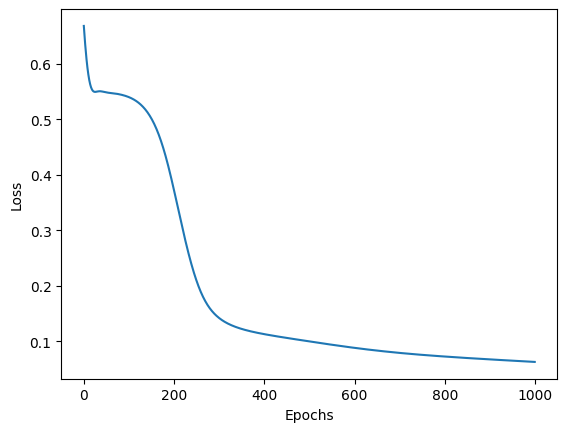

Training Losses are 
          0
0  0.632271
1  0.628662
2  0.625142
3  0.621713
4  0.618377
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[2933  111]
 [ 100  856]]
Accuracy: 0.9473, Precision: 0.8852, Recall: 0.8954, F1-score: 0.8903

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[2923  121]
 [  92  864]]
Accuracy: 0.9467, Precision: 0.8772, Recall: 0.9038, F1-score: 0.8903



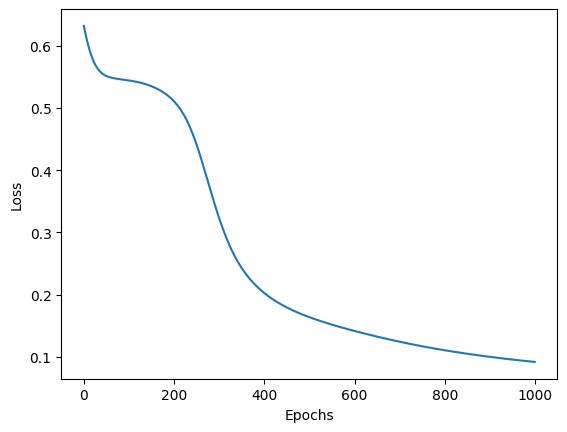

Training Losses are 
          0
0  0.742635
1  0.734471
2  0.726509
3  0.718752
4  0.711204
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[2945   99]
 [  98  858]]
Accuracy: 0.9507, Precision: 0.8966, Recall: 0.8975, F1-score: 0.8970

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[2941  103]
 [  85  871]]
Accuracy: 0.9530, Precision: 0.8943, Recall: 0.9111, F1-score: 0.9026



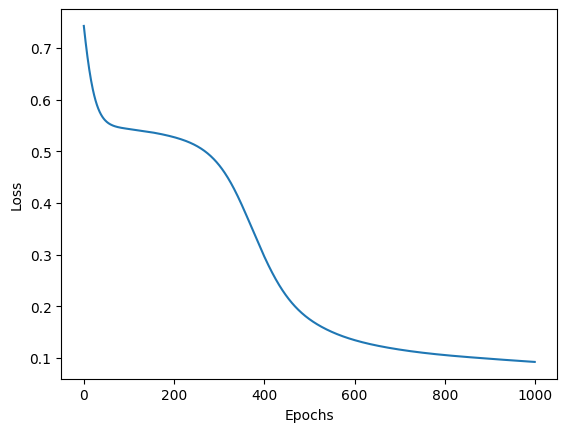

Training Losses are 
          0
0  0.641059
1  0.633246
2  0.625798
3  0.618719
4  0.612014
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[2934  110]
 [ 104  852]]
Accuracy: 0.9465, Precision: 0.8857, Recall: 0.8912, F1-score: 0.8884

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[2929  115]
 [  92  864]]
Accuracy: 0.9483, Precision: 0.8825, Recall: 0.9038, F1-score: 0.8930



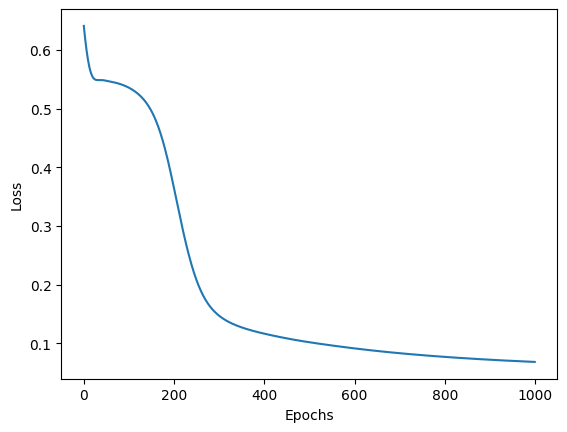

Training Losses are 
          0
0  0.678474
1  0.662156
2  0.647041
3  0.633139
4  0.620450
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[2945   99]
 [ 104  852]]
Accuracy: 0.9493, Precision: 0.8959, Recall: 0.8912, F1-score: 0.8936

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[2941  103]
 [  95  861]]
Accuracy: 0.9505, Precision: 0.8932, Recall: 0.9006, F1-score: 0.8969



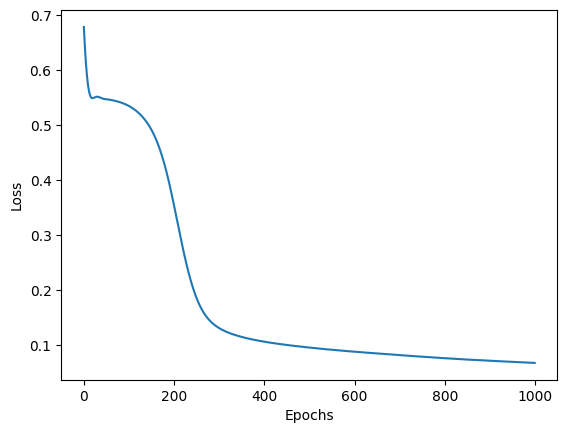

Training Losses are 
          0
0  0.720359
1  0.718512
2  0.716674
3  0.714846
4  0.713027
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[2943  101]
 [  92  864]]
Accuracy: 0.9517, Precision: 0.8953, Recall: 0.9038, F1-score: 0.8995

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[2938  106]
 [  83  873]]
Accuracy: 0.9527, Precision: 0.8917, Recall: 0.9132, F1-score: 0.9023



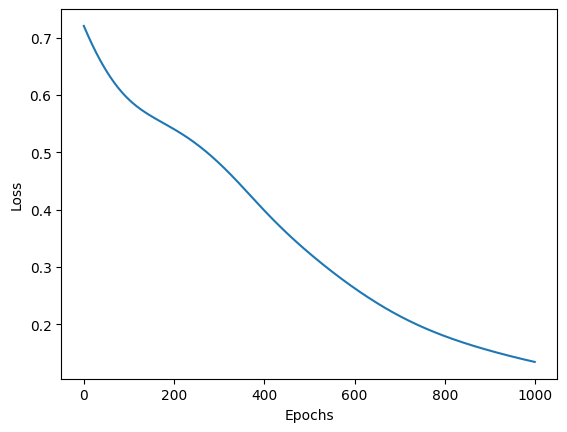

Training Losses are 
          0
0  0.802593
1  0.798259
2  0.793972
3  0.789733
4  0.785541
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[2938  106]
 [  87  869]]
Accuracy: 0.9517, Precision: 0.8913, Recall: 0.9090, F1-score: 0.9001

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[2933  111]
 [  74  882]]
Accuracy: 0.9537, Precision: 0.8882, Recall: 0.9226, F1-score: 0.9051



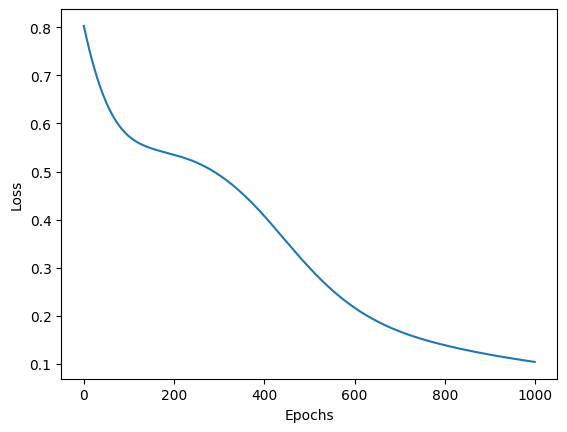

Training Losses are 
          0
0  0.690734
1  0.685238
2  0.679850
3  0.674572
4  0.669407
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[2938  106]
 [ 101  855]]
Accuracy: 0.9483, Precision: 0.8897, Recall: 0.8944, F1-score: 0.8920

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[2935  109]
 [  96  860]]
Accuracy: 0.9487, Precision: 0.8875, Recall: 0.8996, F1-score: 0.8935



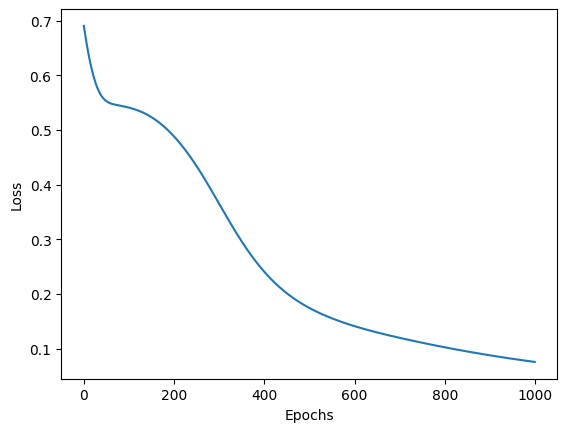

Training Losses are 
          0
0  0.638356
1  0.630729
2  0.623471
3  0.616586
4  0.610076
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[2932  112]
 [ 111  845]]
Accuracy: 0.9443, Precision: 0.8830, Recall: 0.8839, F1-score: 0.8834

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[2943  101]
 [ 106  850]]
Accuracy: 0.9483, Precision: 0.8938, Recall: 0.8891, F1-score: 0.8915



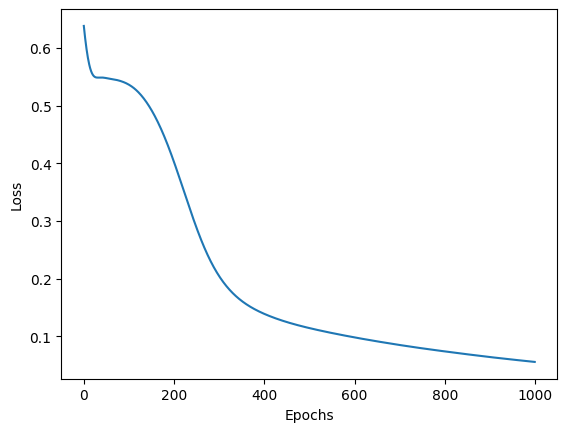

Training Losses are 
          0
0  0.750456
1  0.747417
2  0.744407
3  0.741426
4  0.738476
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[2957   87]
 [  94  862]]
Accuracy: 0.9547, Precision: 0.9083, Recall: 0.9017, F1-score: 0.9050

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[2944  100]
 [  84  872]]
Accuracy: 0.9540, Precision: 0.8971, Recall: 0.9121, F1-score: 0.9046



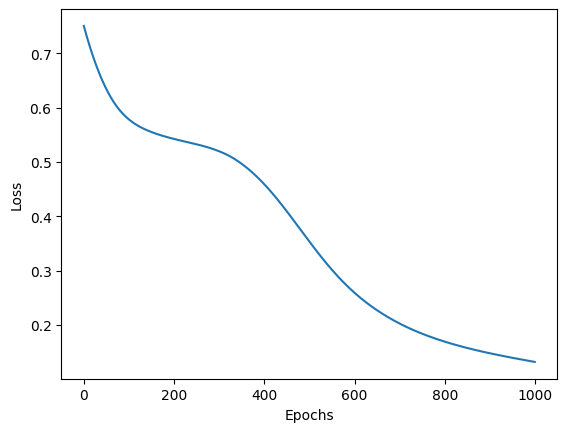

Training Losses are 
          0
0  0.585158
1  0.583337
2  0.581564
3  0.579841
4  0.578169
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[2935  109]
 [ 102  854]]
Accuracy: 0.9473, Precision: 0.8868, Recall: 0.8933, F1-score: 0.8900

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[2935  109]
 [ 103  853]]
Accuracy: 0.9470, Precision: 0.8867, Recall: 0.8923, F1-score: 0.8895



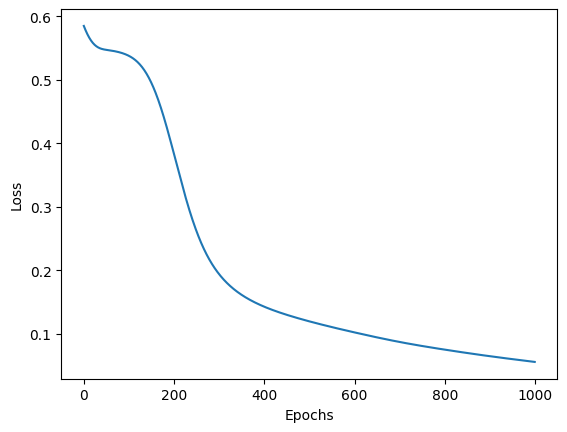

Training Losses are 
          0
0  0.753860
1  0.746129
2  0.738552
3  0.731132
4  0.723873
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[2943  101]
 [  99  857]]
Accuracy: 0.9500, Precision: 0.8946, Recall: 0.8964, F1-score: 0.8955

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[2942  102]
 [  88  868]]
Accuracy: 0.9525, Precision: 0.8948, Recall: 0.9079, F1-score: 0.9013



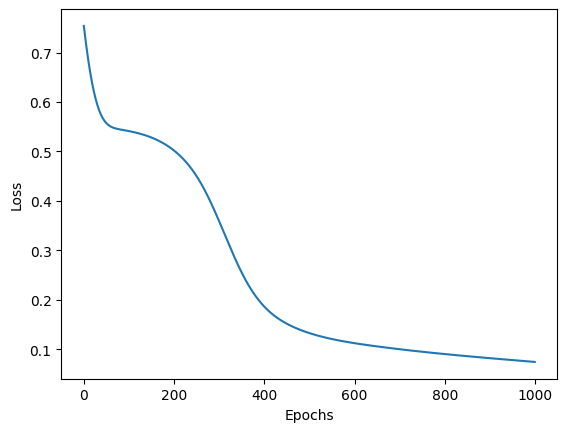

Training Losses are 
          0
0  0.670657
1  0.660796
2  0.651390
3  0.642444
4  0.633961
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[2936  108]
 [ 107  849]]
Accuracy: 0.9463, Precision: 0.8871, Recall: 0.8881, F1-score: 0.8876

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[2924  120]
 [ 106  850]]
Accuracy: 0.9435, Precision: 0.8763, Recall: 0.8891, F1-score: 0.8827



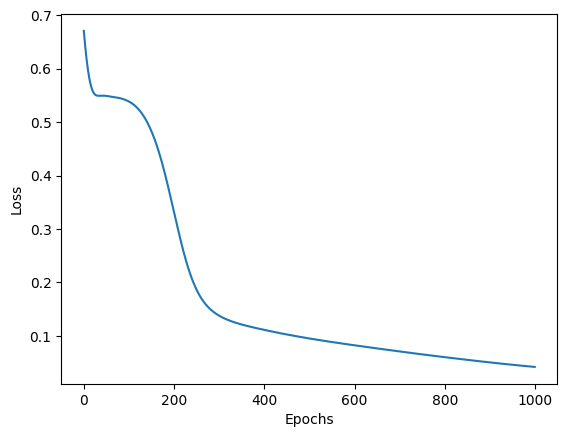

Training Losses are 
          0
0  0.715719
1  0.711636
2  0.707594
3  0.703595
4  0.699640
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[2947   97]
 [  98  858]]
Accuracy: 0.9513, Precision: 0.8984, Recall: 0.8975, F1-score: 0.8980

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[2937  107]
 [  84  872]]
Accuracy: 0.9523, Precision: 0.8907, Recall: 0.9121, F1-score: 0.9013



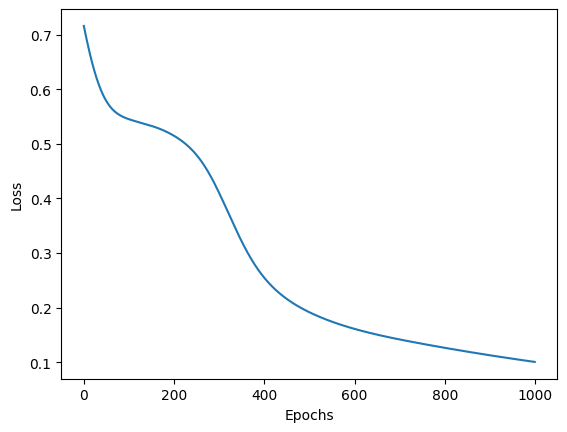

Training Losses are 
          0
0  0.936757
1  0.927511
2  0.918384
3  0.909378
4  0.900493
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[2955   89]
 [ 100  856]]
Accuracy: 0.9527, Precision: 0.9058, Recall: 0.8954, F1-score: 0.9006

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[2941  103]
 [  86  870]]
Accuracy: 0.9527, Precision: 0.8941, Recall: 0.9100, F1-score: 0.9020



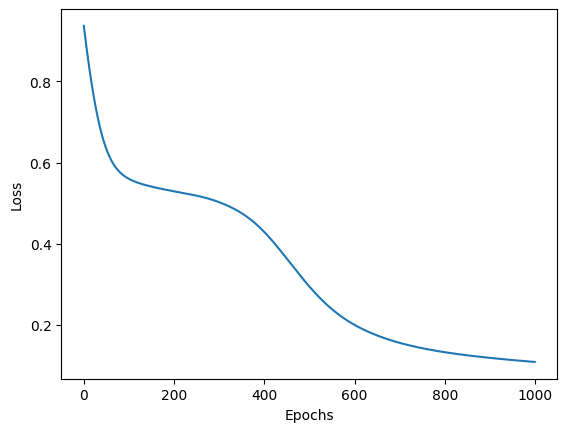

Training Losses are 
          0
0  0.811723
1  0.800771
2  0.790089
3  0.779680
4  0.769548
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[2943  101]
 [ 101  855]]
Accuracy: 0.9495, Precision: 0.8944, Recall: 0.8944, F1-score: 0.8944

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[2938  106]
 [  93  863]]
Accuracy: 0.9503, Precision: 0.8906, Recall: 0.9027, F1-score: 0.8966



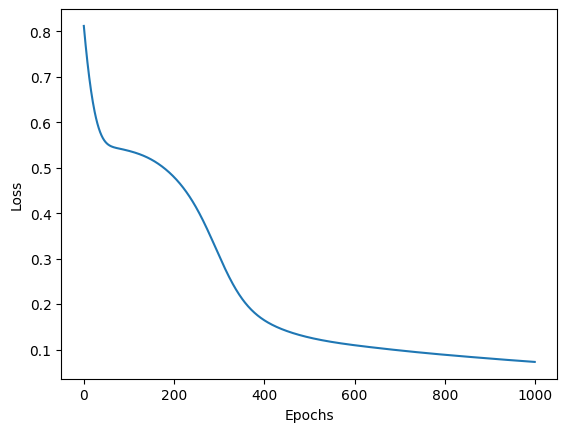

Training Losses are 
          0
0  0.665225
1  0.653310
2  0.642085
3  0.631561
4  0.621742
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[2937  107]
 [ 102  854]]
Accuracy: 0.9477, Precision: 0.8887, Recall: 0.8933, F1-score: 0.8910

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[2934  110]
 [ 106  850]]
Accuracy: 0.9460, Precision: 0.8854, Recall: 0.8891, F1-score: 0.8873



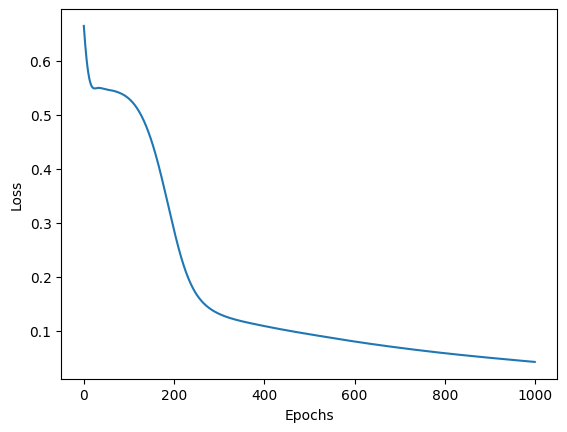

Training Losses are 
          0
0  0.845428
1  0.839538
2  0.833709
3  0.827944
4  0.822248
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[2943  101]
 [ 101  855]]
Accuracy: 0.9495, Precision: 0.8944, Recall: 0.8944, F1-score: 0.8944

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[2946   98]
 [  86  870]]
Accuracy: 0.9540, Precision: 0.8988, Recall: 0.9100, F1-score: 0.9044



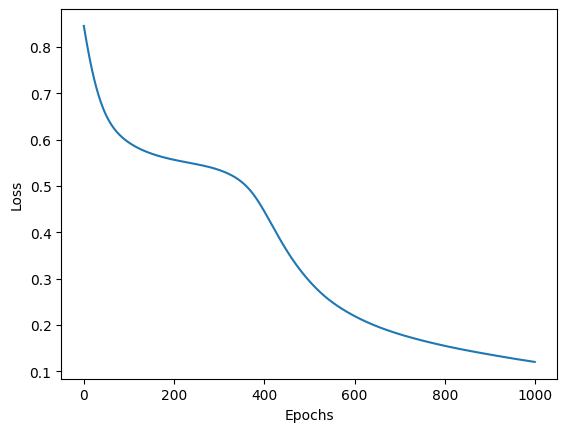

Training Losses are 
          0
0  0.712412
1  0.705716
2  0.699181
3  0.692810
4  0.686605
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[2935  109]
 [ 100  856]]
Accuracy: 0.9477, Precision: 0.8870, Recall: 0.8954, F1-score: 0.8912

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[2933  111]
 [  99  857]]
Accuracy: 0.9475, Precision: 0.8853, Recall: 0.8964, F1-score: 0.8909



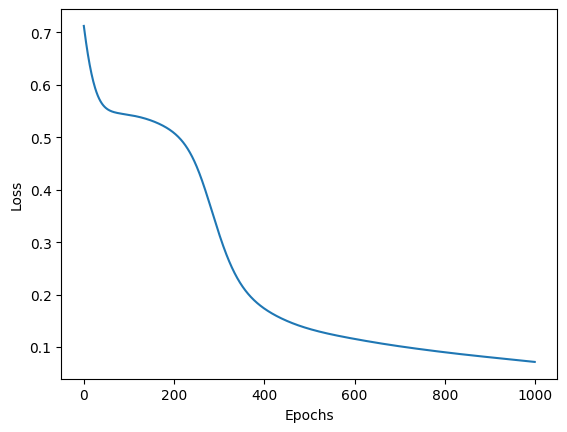

Training Losses are 
          0
0  0.804654
1  0.791144
2  0.778026
3  0.765304
4  0.752984
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[2939  105]
 [  95  861]]
Accuracy: 0.9500, Precision: 0.8913, Recall: 0.9006, F1-score: 0.8959

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[2937  107]
 [  93  863]]
Accuracy: 0.9500, Precision: 0.8897, Recall: 0.9027, F1-score: 0.8962



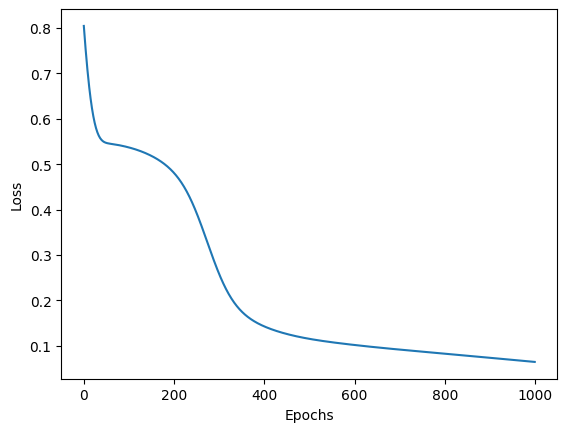

Training Losses are 
          0
0  0.659563
1  0.645769
2  0.632976
3  0.621194
4  0.610423
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[2913  131]
 [ 109  847]]
Accuracy: 0.9400, Precision: 0.8661, Recall: 0.8860, F1-score: 0.8759

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[2925  119]
 [ 120  836]]
Accuracy: 0.9403, Precision: 0.8754, Recall: 0.8745, F1-score: 0.8749



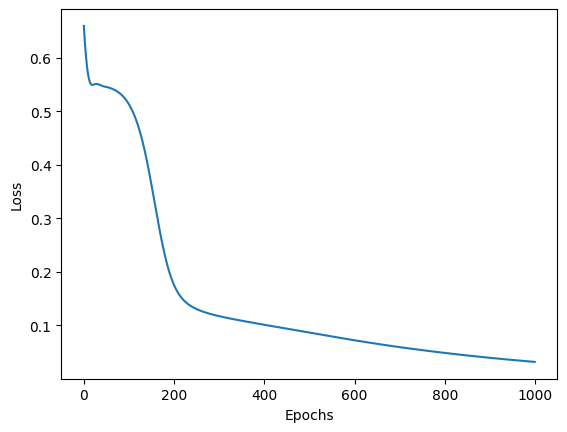

Training Losses are 
          0
0  0.742364
1  0.740054
2  0.737770
3  0.735511
4  0.733277
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[2960   84]
 [ 105  851]]
Accuracy: 0.9527, Precision: 0.9102, Recall: 0.8902, F1-score: 0.9001

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[2961   83]
 [  91  865]]
Accuracy: 0.9565, Precision: 0.9124, Recall: 0.9048, F1-score: 0.9086



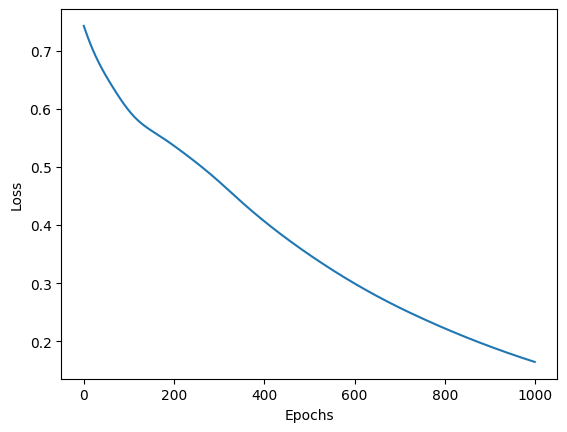

Training Losses are 
          0
0  0.641691
1  0.639113
2  0.636569
3  0.634060
4  0.631587
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[2937  107]
 [ 106  850]]
Accuracy: 0.9467, Precision: 0.8882, Recall: 0.8891, F1-score: 0.8887

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[2942  102]
 [  93  863]]
Accuracy: 0.9513, Precision: 0.8943, Recall: 0.9027, F1-score: 0.8985



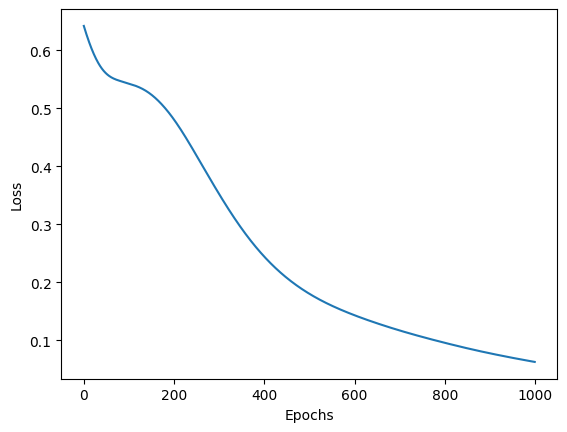

Training Losses are 
          0
0  0.672402
1  0.667171
2  0.662066
3  0.657088
4  0.652239
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[2945   99]
 [ 112  844]]
Accuracy: 0.9473, Precision: 0.8950, Recall: 0.8828, F1-score: 0.8889

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[2936  108]
 [ 106  850]]
Accuracy: 0.9465, Precision: 0.8873, Recall: 0.8891, F1-score: 0.8882



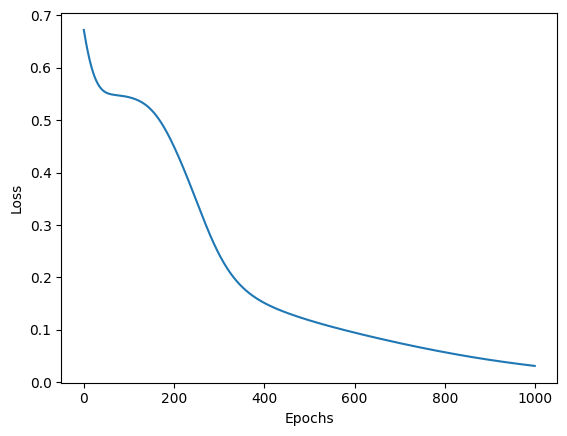

Training Losses are 
          0
0  0.584555
1  0.579854
2  0.575523
3  0.571564
4  0.567974
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[2932  112]
 [ 112  844]]
Accuracy: 0.9440, Precision: 0.8828, Recall: 0.8828, F1-score: 0.8828

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[2930  114]
 [ 111  845]]
Accuracy: 0.9437, Precision: 0.8811, Recall: 0.8839, F1-score: 0.8825



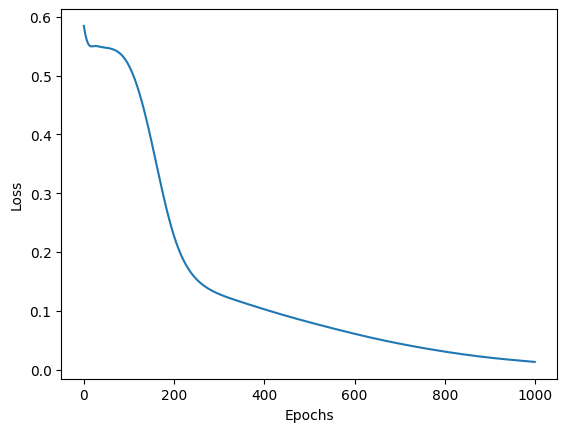

Training Losses are 
          0
0  0.868036
1  0.864174
2  0.860334
3  0.856516
4  0.852722
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[2948   96]
 [  92  864]]
Accuracy: 0.9530, Precision: 0.9000, Recall: 0.9038, F1-score: 0.9019

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[2940  104]
 [  82  874]]
Accuracy: 0.9535, Precision: 0.8937, Recall: 0.9142, F1-score: 0.9038



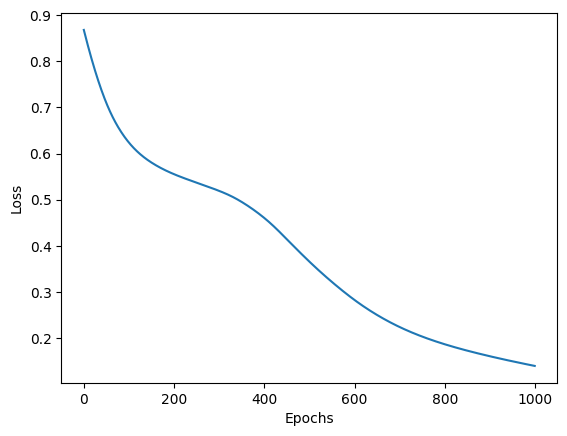

Training Losses are 
          0
0  0.661731
1  0.658579
2  0.655472
3  0.652410
4  0.649394
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[2931  113]
 [ 106  850]]
Accuracy: 0.9453, Precision: 0.8827, Recall: 0.8891, F1-score: 0.8859

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[2934  110]
 [ 101  855]]
Accuracy: 0.9473, Precision: 0.8860, Recall: 0.8944, F1-score: 0.8902



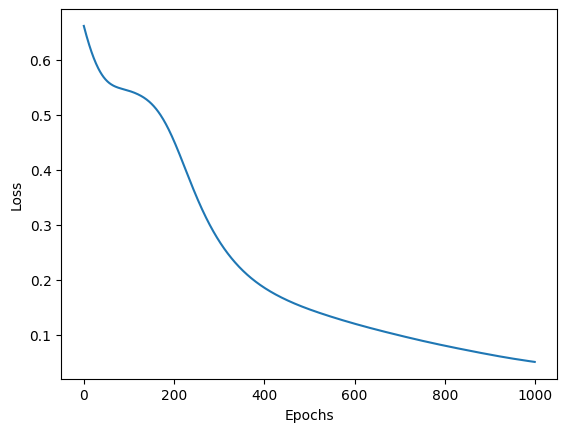

Training Losses are 
          0
0  0.665912
1  0.660075
2  0.654402
3  0.648892
4  0.643545
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[2935  109]
 [ 110  846]]
Accuracy: 0.9453, Precision: 0.8859, Recall: 0.8849, F1-score: 0.8854

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[2936  108]
 [ 108  848]]
Accuracy: 0.9460, Precision: 0.8870, Recall: 0.8870, F1-score: 0.8870



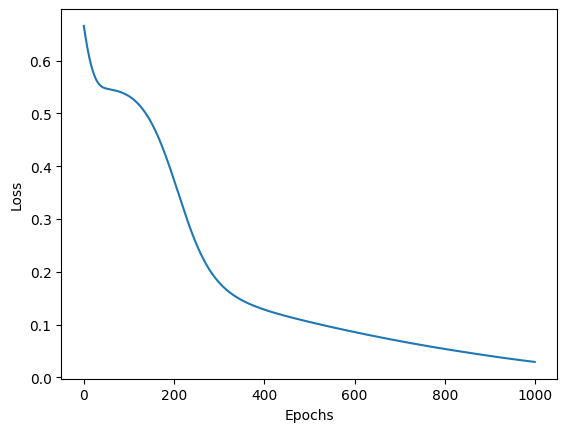

Training Losses are 
          0
0  0.626943
1  0.618600
2  0.610787
3  0.603507
4  0.596758
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[2927  117]
 [ 120  836]]
Accuracy: 0.9407, Precision: 0.8772, Recall: 0.8745, F1-score: 0.8759

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[2923  121]
 [ 121  835]]
Accuracy: 0.9395, Precision: 0.8734, Recall: 0.8734, F1-score: 0.8734



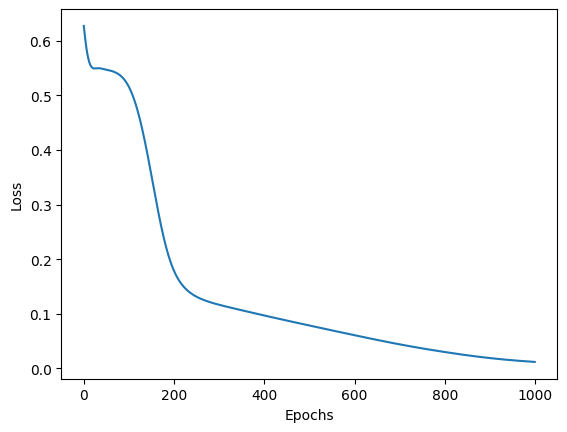

Training Losses are 
          0
0  0.741259
1  0.737363
2  0.733506
3  0.729692
4  0.725921
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[2932  112]
 [ 100  856]]
Accuracy: 0.9470, Precision: 0.8843, Recall: 0.8954, F1-score: 0.8898

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[2934  110]
 [  88  868]]
Accuracy: 0.9505, Precision: 0.8875, Recall: 0.9079, F1-score: 0.8976



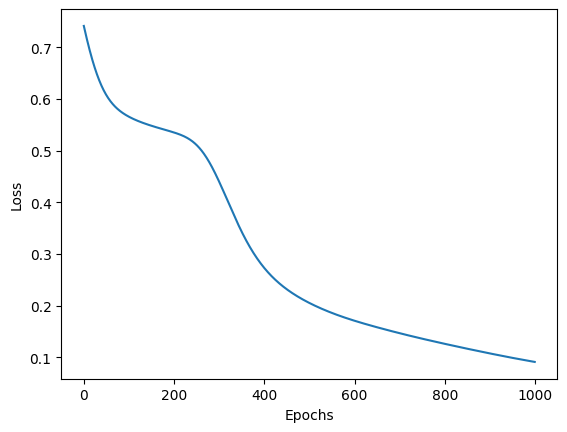

Training Losses are 
          0
0  0.712160
1  0.706293
2  0.700538
3  0.694899
4  0.689376
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[2936  108]
 [ 123  833]]
Accuracy: 0.9423, Precision: 0.8852, Recall: 0.8713, F1-score: 0.8782

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[2935  109]
 [ 114  842]]
Accuracy: 0.9443, Precision: 0.8854, Recall: 0.8808, F1-score: 0.8831



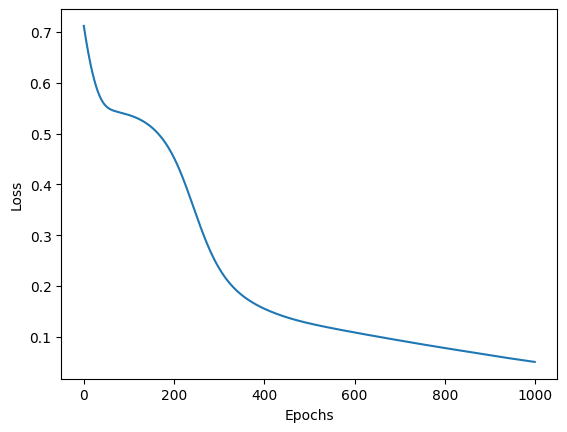

Training Losses are 
          0
0  0.741306
1  0.731854
2  0.722676
3  0.713775
4  0.705153
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[2934  110]
 [ 108  848]]
Accuracy: 0.9455, Precision: 0.8852, Recall: 0.8870, F1-score: 0.8861

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[2931  113]
 [ 127  829]]
Accuracy: 0.9400, Precision: 0.8800, Recall: 0.8672, F1-score: 0.8736



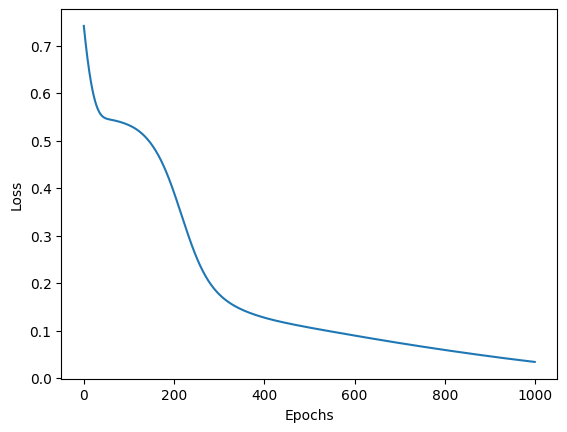

Training Losses are 
          0
0  0.791136
1  0.773140
2  0.755903
3  0.739433
4  0.723734
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[2944  100]
 [ 120  836]]
Accuracy: 0.9450, Precision: 0.8932, Recall: 0.8745, F1-score: 0.8837

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[2938  106]
 [ 112  844]]
Accuracy: 0.9455, Precision: 0.8884, Recall: 0.8828, F1-score: 0.8856



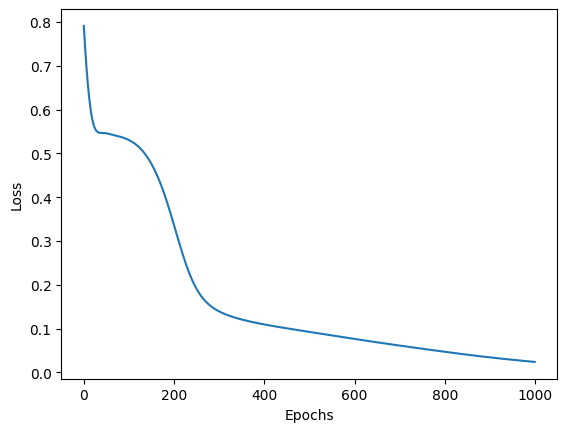

Training Losses are 
          0
0  0.659990
1  0.655273
2  0.650668
3  0.646179
4  0.641809
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[2932  112]
 [ 114  842]]
Accuracy: 0.9435, Precision: 0.8826, Recall: 0.8808, F1-score: 0.8817

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[2941  103]
 [ 114  842]]
Accuracy: 0.9457, Precision: 0.8910, Recall: 0.8808, F1-score: 0.8858



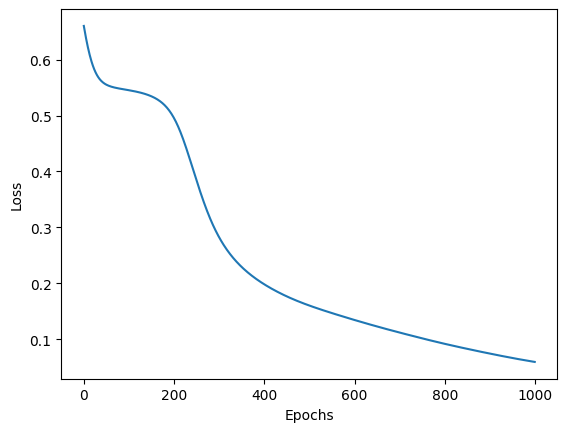

Training Losses are 
          0
0  0.691770
1  0.683680
2  0.675800
3  0.668139
4  0.660708
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[2927  117]
 [ 112  844]]
Accuracy: 0.9427, Precision: 0.8783, Recall: 0.8828, F1-score: 0.8805

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[2930  114]
 [ 112  844]]
Accuracy: 0.9435, Precision: 0.8810, Recall: 0.8828, F1-score: 0.8819



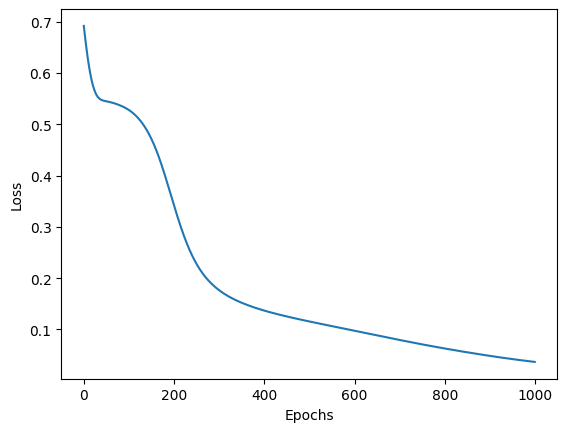

Training Losses are 
          0
0  0.794754
1  0.779261
2  0.764260
3  0.749759
4  0.735775
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[2927  117]
 [ 114  842]]
Accuracy: 0.9423, Precision: 0.8780, Recall: 0.8808, F1-score: 0.8794

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[2939  105]
 [ 104  852]]
Accuracy: 0.9477, Precision: 0.8903, Recall: 0.8912, F1-score: 0.8907



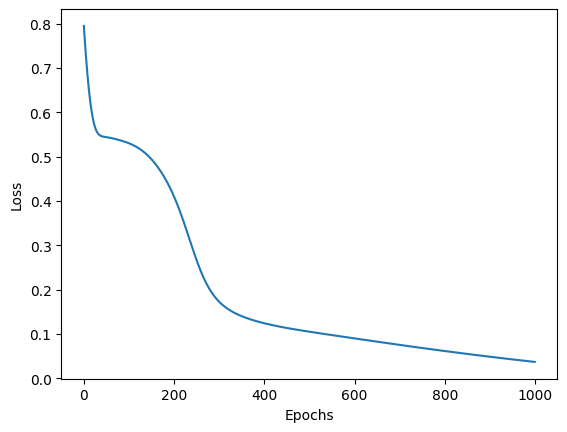

Training Losses are 
          0
0  0.824810
1  0.799245
2  0.775053
3  0.752247
4  0.730832
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[2925  119]
 [ 112  844]]
Accuracy: 0.9423, Precision: 0.8764, Recall: 0.8828, F1-score: 0.8796

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[2923  121]
 [ 111  845]]
Accuracy: 0.9420, Precision: 0.8747, Recall: 0.8839, F1-score: 0.8793



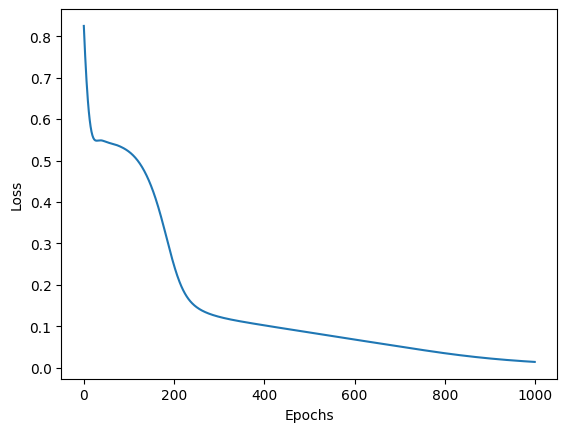

The best accuracy on test data is 0.958 for layers 8 , 32, 64


In [21]:
nuerons = [8,16,32,64]
best_score=0
layer1=0
layer2=0
layer3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = TripleLayer(33,nueron,double_nueron,triple_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      if acc > best_score:
          best_score=acc
          layer1=nueron
          layer2=double_nueron
          layer3=triple_nueron
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()
print(f"The best accuracy on test data is {best_score} for layers {layer1} , {layer2}, {layer3}")